In [5]:
%pip install gudhi
import gudhi
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from gudhi.hera import bottleneck_distance
import matplotlib.pyplot as plt

#Lectura datos colab
#df = pd.read_csv("drive/MyDrive/global_05212025.csv")


In [6]:
#lectura dato VS Code
import requests

file_id = "1sVs0C8uCdlezlENIIkquHIKBYZodHvnK"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

response = requests.get(url)
with open("global_05212025.csv", "wb") as f:
    f.write(response.content)

df = pd.read_csv("global_05212025.csv")


In [7]:
#Columas y descripcion
print(df.columns)
print(df.describe())

#Elimina colm threshold
if "threshold" in df.columns:
    df = df.drop(columns=["threshold"])

Index(['country', 'subnational1', 'threshold', 'tc_loss_ha_2002',
       'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005',
       'tc_loss_ha_2006', 'tc_loss_ha_2007', 'tc_loss_ha_2008',
       'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011',
       'tc_loss_ha_2012', 'tc_loss_ha_2013', 'tc_loss_ha_2014',
       'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017',
       'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020',
       'tc_loss_ha_2021', 'tc_loss_ha_2022', 'tc_loss_ha_2023', '`'],
      dtype='object')
       threshold  tc_loss_ha_2002  tc_loss_ha_2003  tc_loss_ha_2004  \
count     1060.0      1060.000000      1060.000000      1060.000000   
mean        30.0      2504.472642      2340.027358      3197.453774   
std          0.0     26815.192837     27526.454240     35724.415515   
min         30.0         0.000000         0.000000         0.000000   
25%         30.0         2.000000         2.000000         4.000000   
50%         30.0        47.00000

[0.93107699 0.03395225 0.01487364]


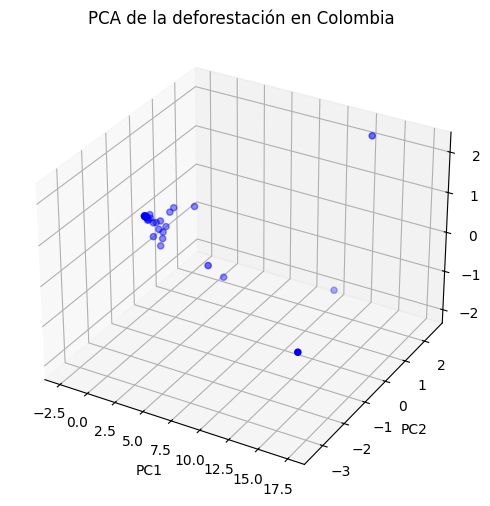

/usr/local/lib/python3.12/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


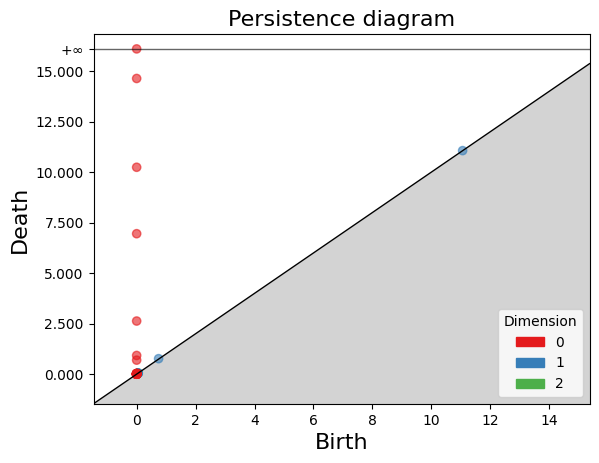

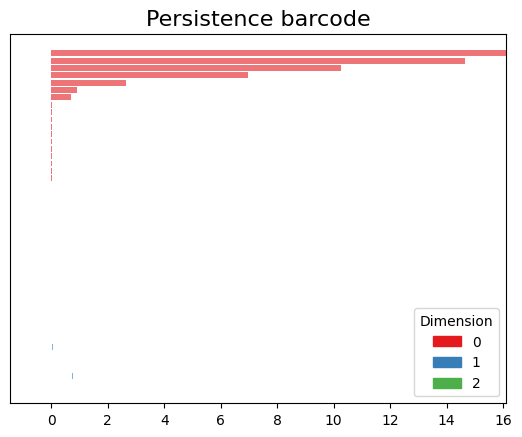

In [8]:
#Deforestación para Colombia

#Filtrar para Colombia
df_colombia = df[df["country"] == "Colombia"].copy()
df_colombia["subnational1"] = df_colombia["subnational1"].astype("category")
df_colombia = df_colombia.drop(columns=["country"])

#Variables numéricas
X = df_colombia.drop(columns=["subnational1"]).values

#Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA a 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)

#Gráfica 3d
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c="blue", s=20)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA de la deforestación en Colombia")
plt.show()

#Alpha Complex
alpha_complex = gudhi.AlphaComplex(points=X_pca)
simplex_tree = alpha_complex.create_simplex_tree()

#Calcular homología persistente
diag = simplex_tree.persistence()

#Graficar diagrama de persistencia
gudhi.plot_persistence_diagram(diag)
plt.show()

#Graficar barcode
gudhi.plot_persistence_barcode(diag)
plt.show()


Varianza por los 3 componentes: [0.88308934 0.04467669 0.03679081]


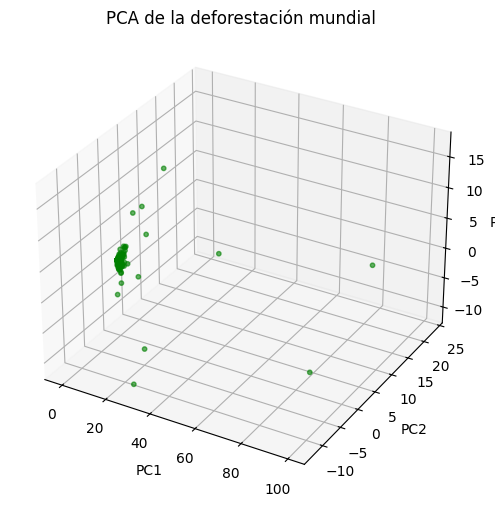

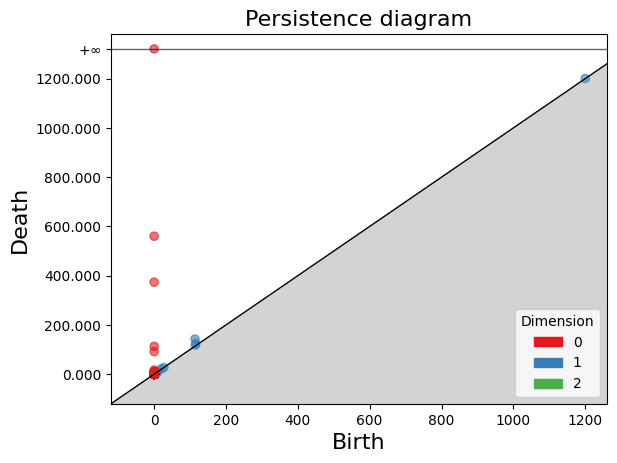

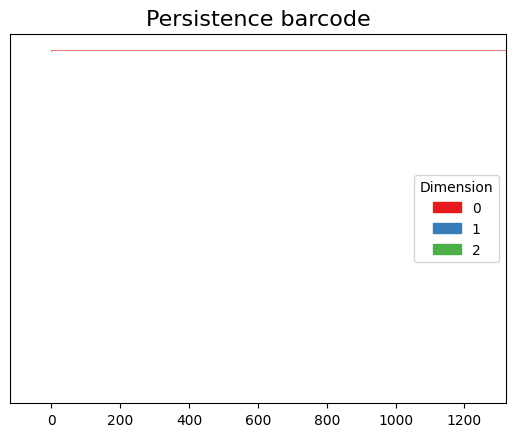

In [9]:
# Deforestación mundial

# Convertir variables categóricas
df["country"] = df["country"].astype("category")
df["subnational1"] = df["subnational1"].astype("category")

# Quitar columnas categóricas para análisis numérico
X = df.drop(columns=["country", "subnational1"]).values

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Varianza por los 3 componentes:", pca.explained_variance_ratio_)

# Grafica 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c="green", s=10, alpha=0.6)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA de la deforestación mundial")
plt.show()

# Crear complejo alpha
alpha_complex = gudhi.AlphaComplex(points=X_pca)
simplex_tree = alpha_complex.create_simplex_tree()

# Calcular homología persistente
diag = simplex_tree.persistence()

# Graficar diagrama de persistencia
gudhi.plot_persistence_diagram(diag)
plt.show()

# Graficar código de barras (barcode)
gudhi.plot_persistence_barcode(diag)
plt.show()


Procesando país: Angola

Varianza explicada por los 3 componentes: [0.88177632 0.05699471 0.04070541]


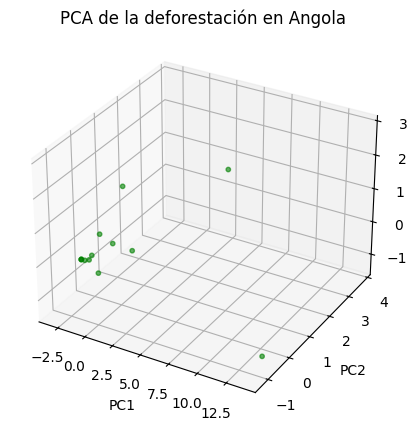

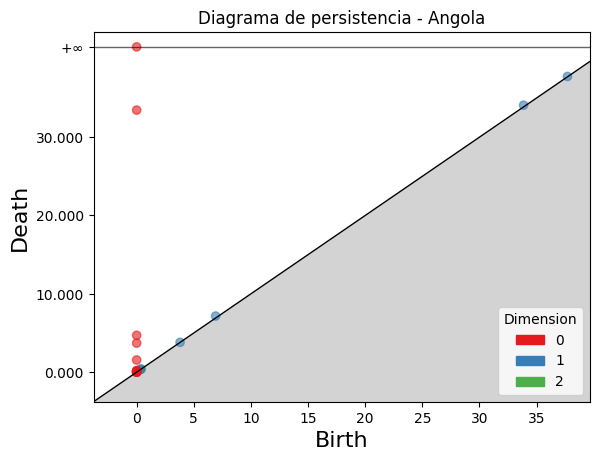


Procesando país: Argentina

Muy pocos datos para Argentina, se omite.

Procesando país: Australia

Muy pocos datos para Australia, se omite.

Procesando país: Bangladesh

Muy pocos datos para Bangladesh, se omite.

Procesando país: Benin

Muy pocos datos para Benin, se omite.

Procesando país: Bhutan

Varianza explicada por los 3 componentes: [0.3947972  0.16173782 0.11263841]


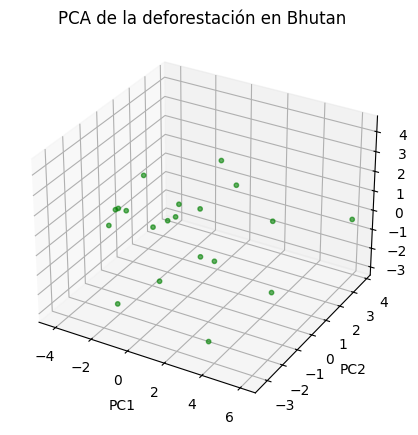

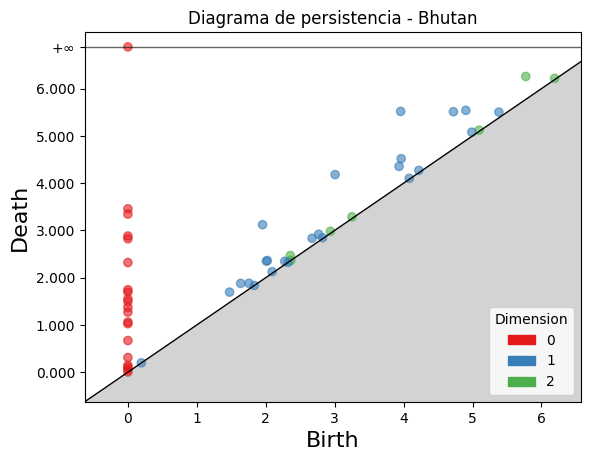


Procesando país: Bolivia

Muy pocos datos para Bolivia, se omite.

Procesando país: Brazil

Varianza explicada por los 3 componentes: [0.93979264 0.04423518 0.0086147 ]


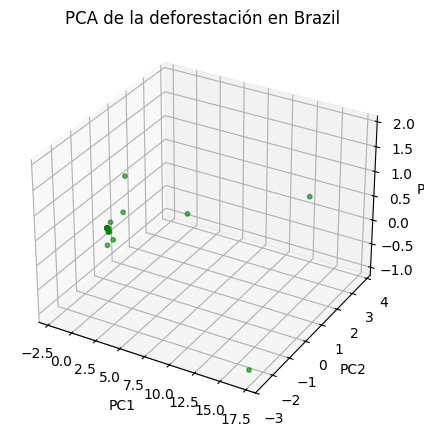

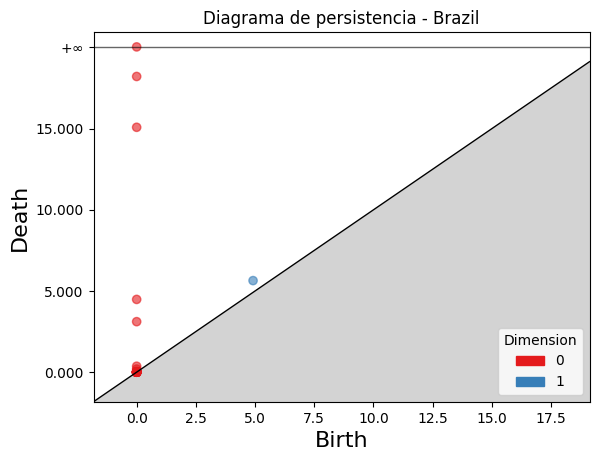


Procesando país: Brunei

Muy pocos datos para Brunei, se omite.

Procesando país: Burundi

Muy pocos datos para Burundi, se omite.

Procesando país: Cambodia

Varianza explicada por los 3 componentes: [0.6297198  0.16517222 0.08850601]


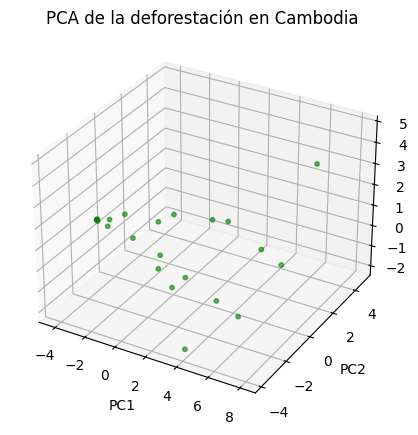

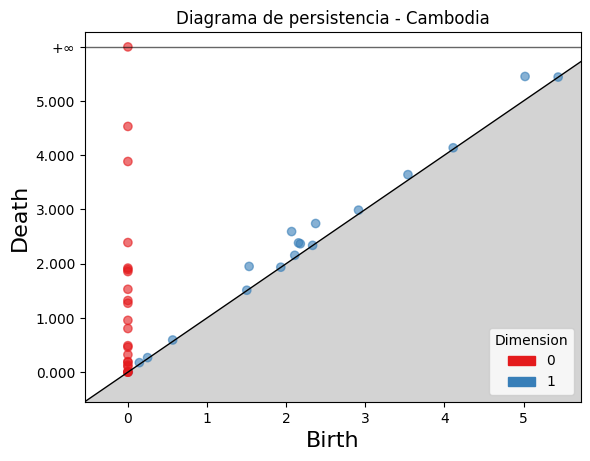


Procesando país: Cameroon

Muy pocos datos para Cameroon, se omite.

Procesando país: Central African Republic

Varianza explicada por los 3 componentes: [0.78383122 0.09385958 0.05271842]


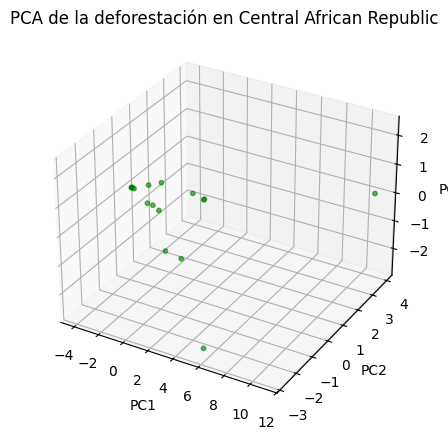

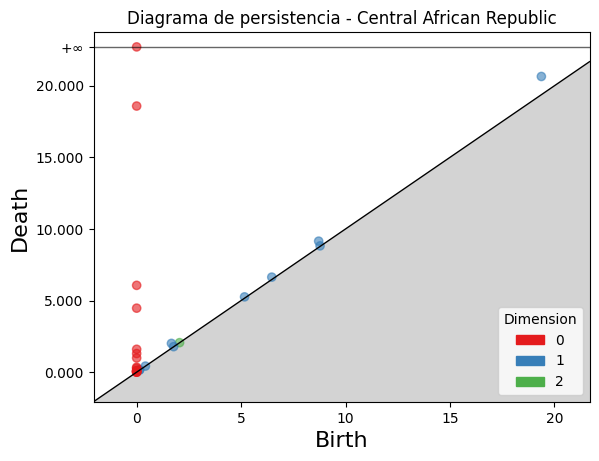


Procesando país: China

Muy pocos datos para China, se omite.

Procesando país: Colombia

Varianza explicada por los 3 componentes: [0.93107699 0.03395225 0.01487364]


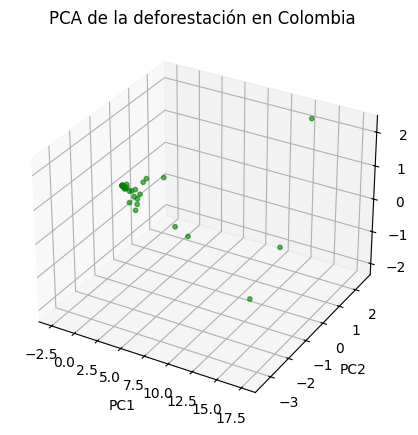

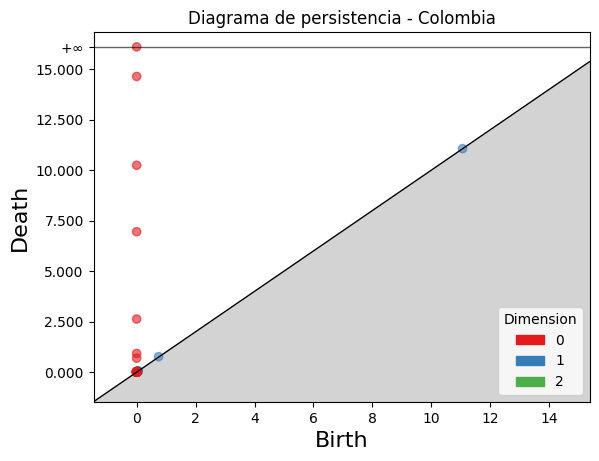


Procesando país: Costa Rica

Muy pocos datos para Costa Rica, se omite.

Procesando país: Côte d'Ivoire

Muy pocos datos para Côte d'Ivoire, se omite.

Procesando país: Cuba

Varianza explicada por los 3 componentes: [0.39050153 0.2083363  0.11084352]


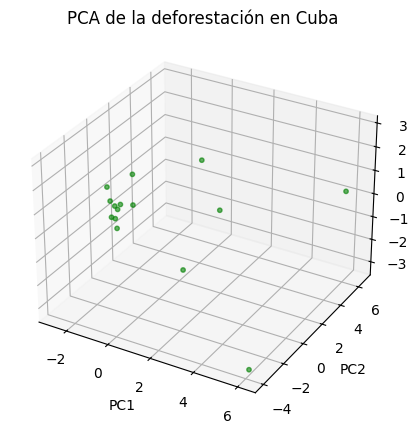

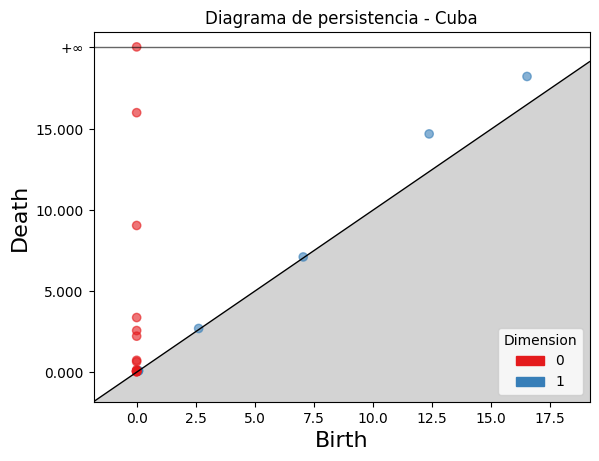


Procesando país: Democratic Republic of the Congo

Varianza explicada por los 3 componentes: [0.79719495 0.05964769 0.03730548]


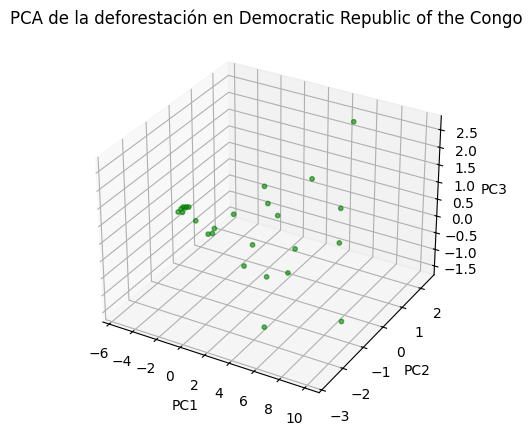

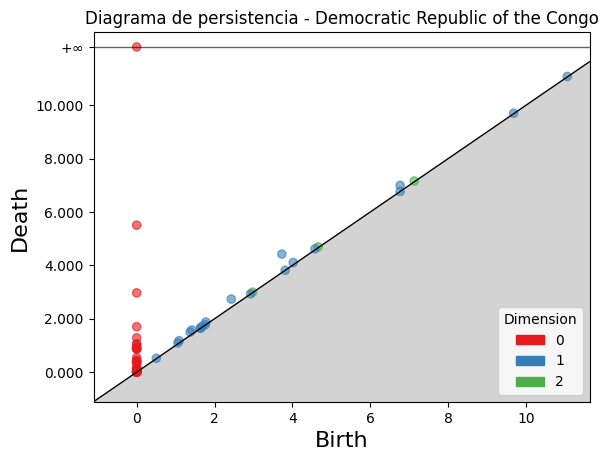


Procesando país: Dominican Republic

Varianza explicada por los 3 componentes: [0.72328101 0.08345629 0.06483985]


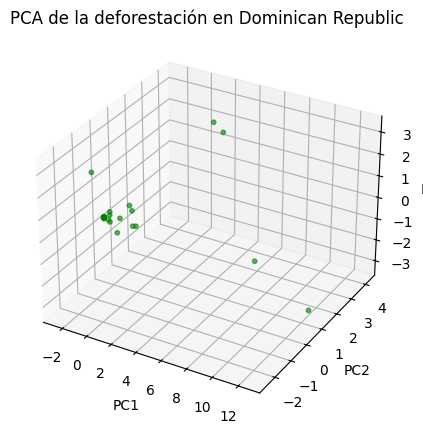

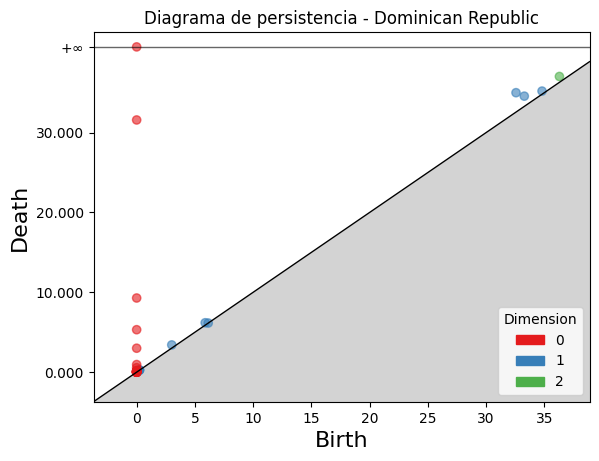


Procesando país: Ecuador

Varianza explicada por los 3 componentes: [0.9396383  0.02849585 0.0117741 ]


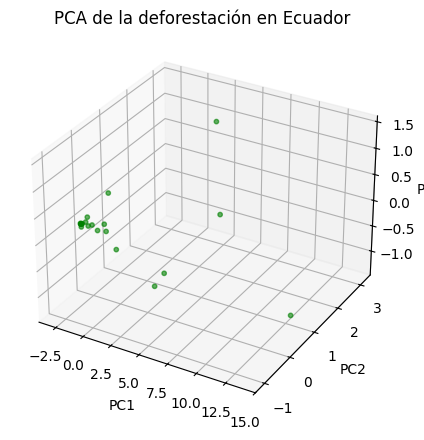

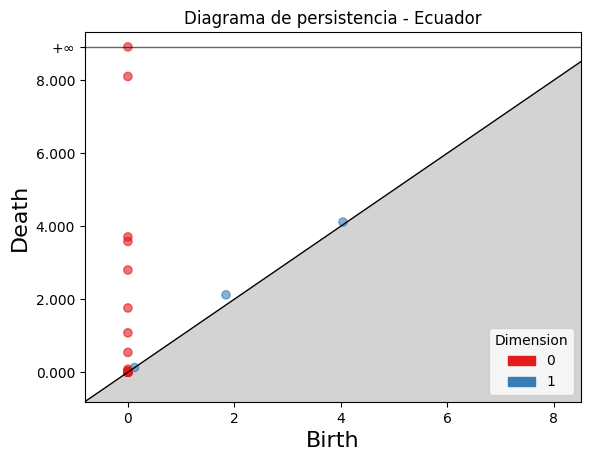


Procesando país: El Salvador

Varianza explicada por los 3 componentes: [0.89877019 0.06221871 0.01826624]


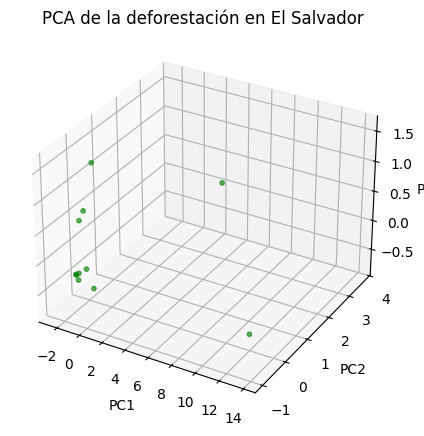

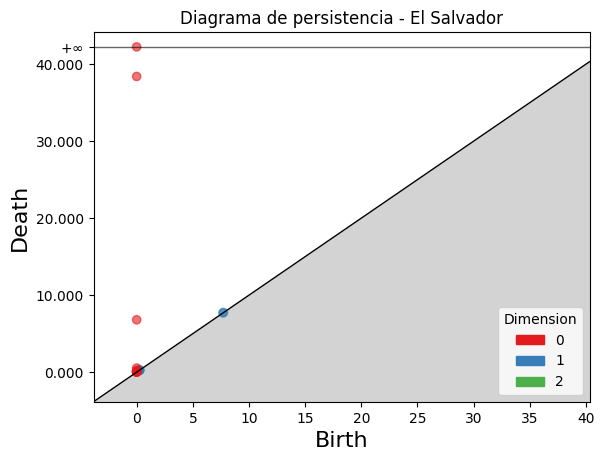


Procesando país: Equatorial Guinea

Muy pocos datos para Equatorial Guinea, se omite.

Procesando país: Ethiopia

Muy pocos datos para Ethiopia, se omite.

Procesando país: Fiji

Muy pocos datos para Fiji, se omite.

Procesando país: French Guiana

Muy pocos datos para French Guiana, se omite.

Procesando país: Gabon

Muy pocos datos para Gabon, se omite.

Procesando país: Gambia

Muy pocos datos para Gambia, se omite.

Procesando país: Ghana

Muy pocos datos para Ghana, se omite.

Procesando país: Guadeloupe

Muy pocos datos para Guadeloupe, se omite.

Procesando país: Guatemala

Varianza explicada por los 3 componentes: [0.97500319 0.02199715 0.00241377]


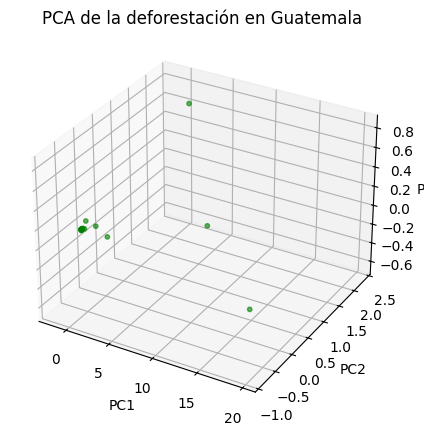

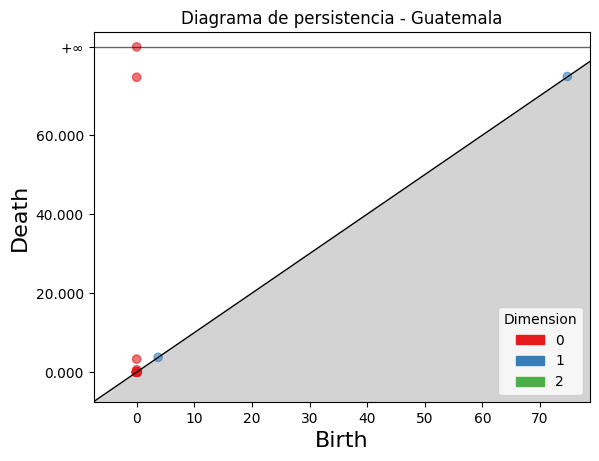


Procesando país: Guinea

Muy pocos datos para Guinea, se omite.

Procesando país: Guinea-Bissau

Muy pocos datos para Guinea-Bissau, se omite.

Procesando país: Guyana

Varianza explicada por los 3 componentes: [0.8727108  0.07627268 0.02346838]


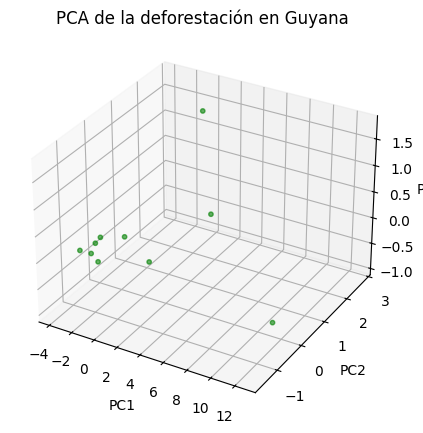

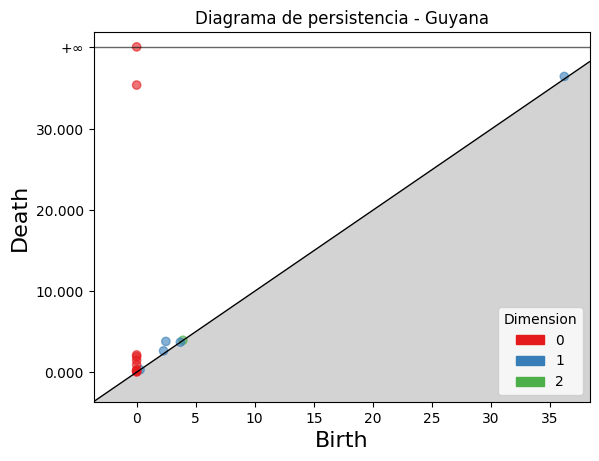


Procesando país: Haiti

Varianza explicada por los 3 componentes: [0.52051695 0.28668677 0.11280258]


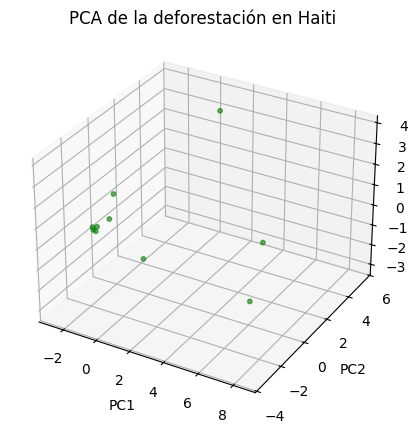

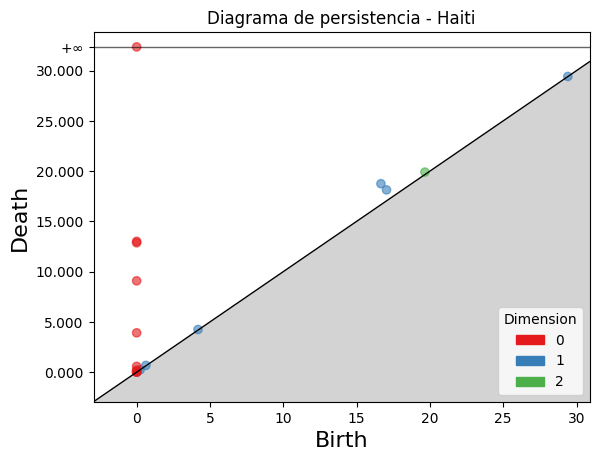


Procesando país: Honduras

Varianza explicada por los 3 componentes: [0.93097414 0.05063257 0.01585867]


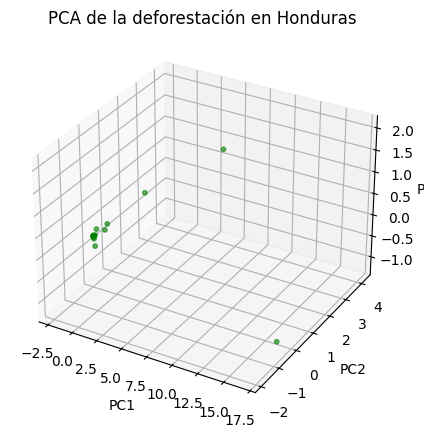

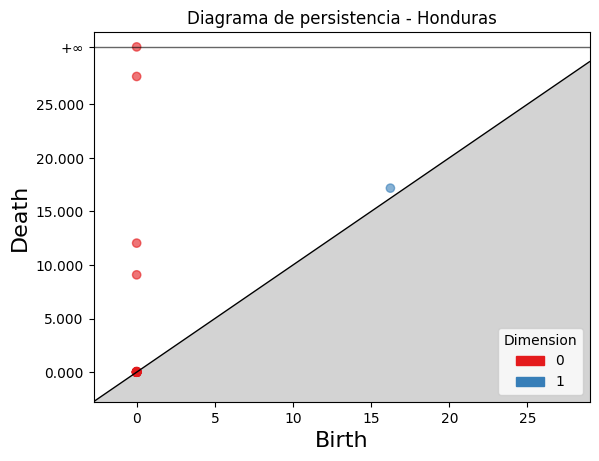


Procesando país: India

Varianza explicada por los 3 componentes: [0.92239495 0.0363061  0.01538031]


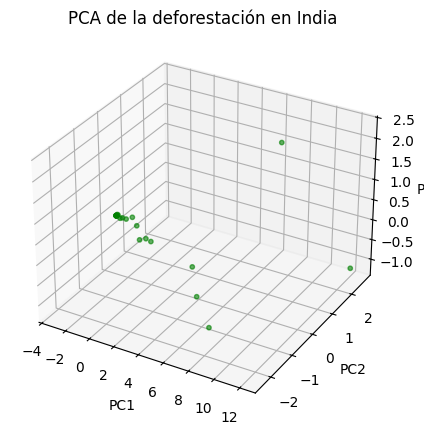

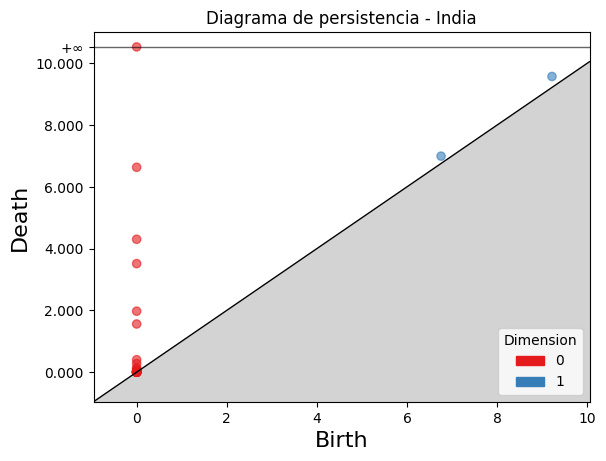


Procesando país: Indonesia

Varianza explicada por los 3 componentes: [0.81004792 0.11451397 0.04365695]


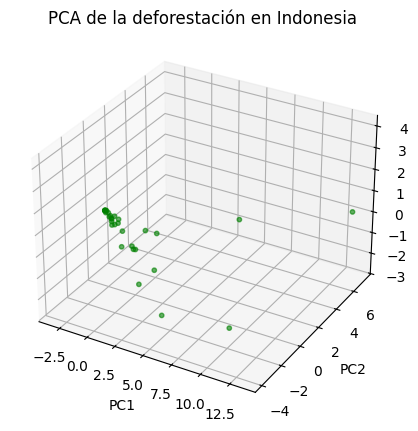

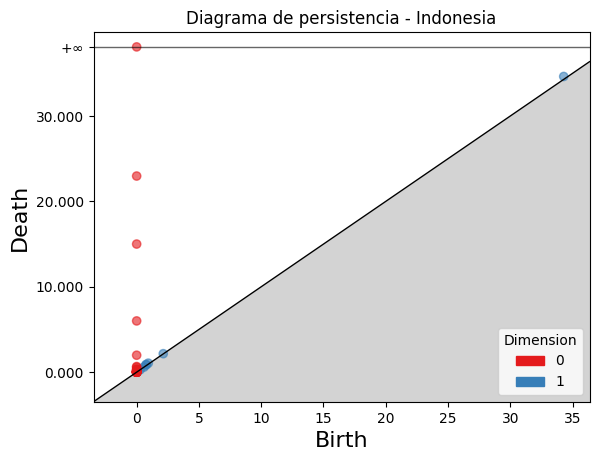


Procesando país: Kenya

Varianza explicada por los 3 componentes: [0.91210645 0.04338476 0.01713634]


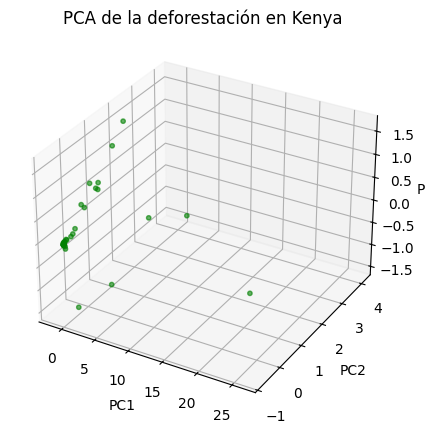

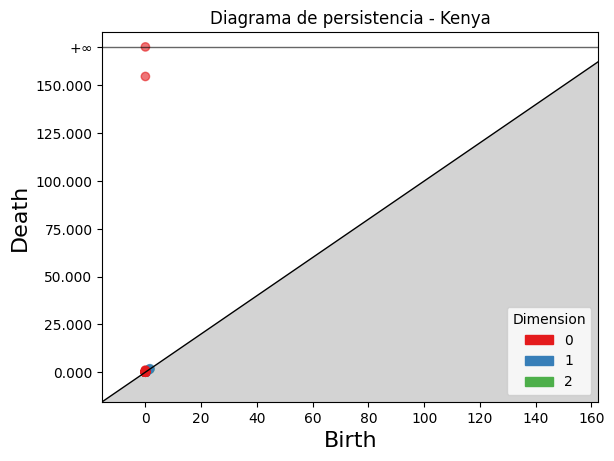


Procesando país: Laos

Varianza explicada por los 3 componentes: [0.79307128 0.07072111 0.04071553]


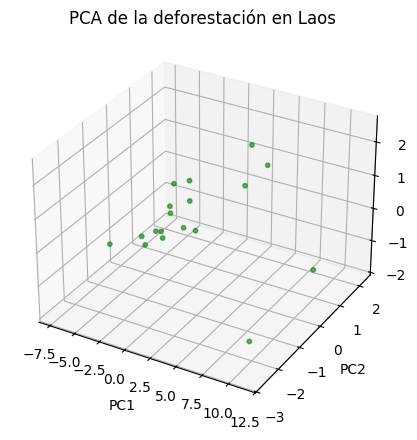

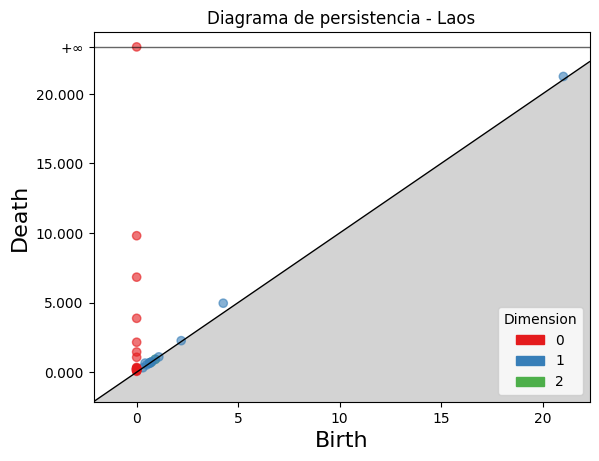


Procesando país: Liberia

Varianza explicada por los 3 componentes: [0.67750464 0.12730956 0.08302733]


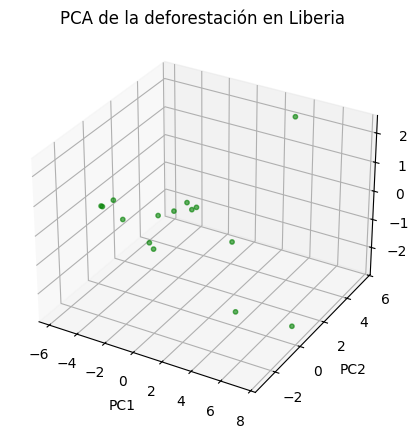

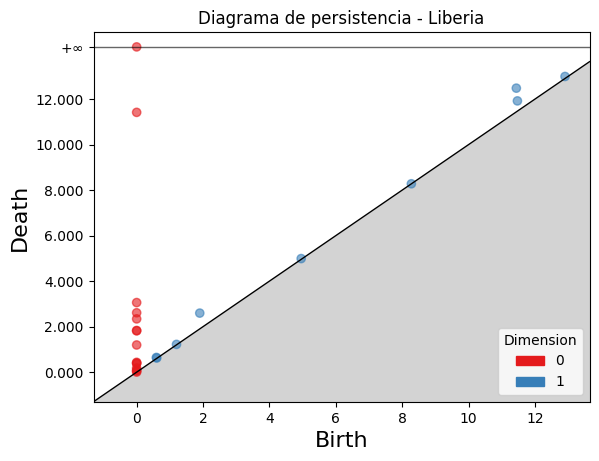


Procesando país: Madagascar

Muy pocos datos para Madagascar, se omite.

Procesando país: Malawi

Muy pocos datos para Malawi, se omite.

Procesando país: Malaysia

Varianza explicada por los 3 componentes: [0.97414728 0.0181144  0.00404517]


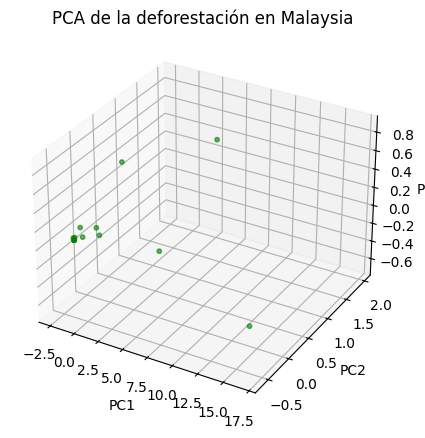

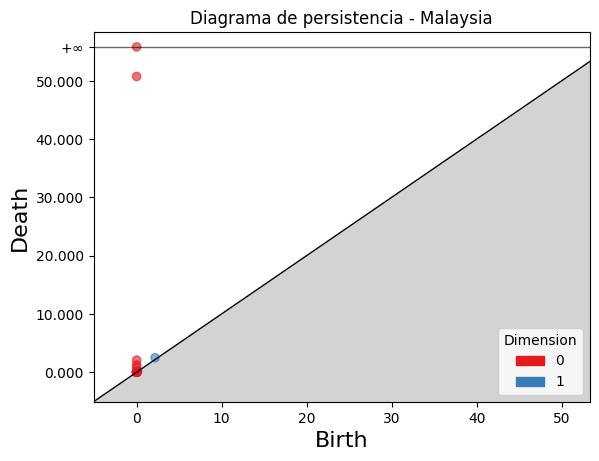


Procesando país: Martinique

Muy pocos datos para Martinique, se omite.

Procesando país: México

Varianza explicada por los 3 componentes: [0.93587988 0.03017898 0.02395244]


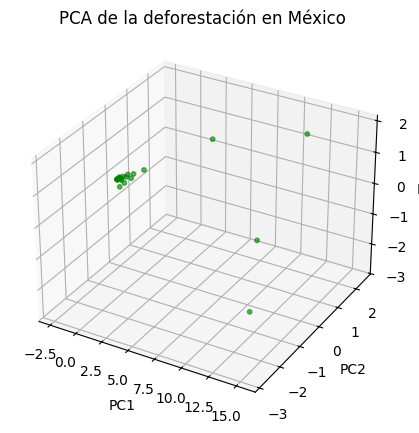

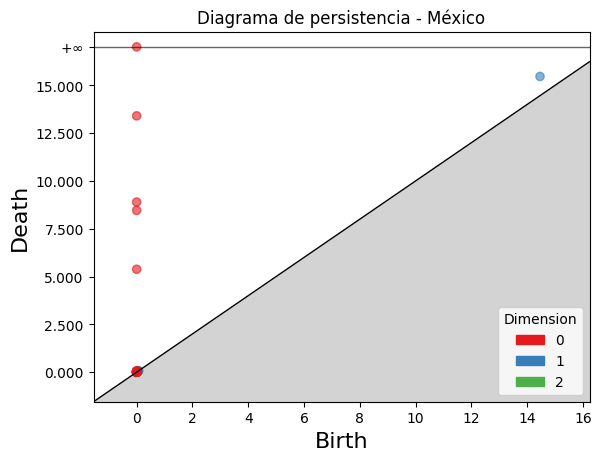


Procesando país: Mozambique

Muy pocos datos para Mozambique, se omite.

Procesando país: Myanmar

Varianza explicada por los 3 componentes: [0.93282248 0.03285325 0.02422785]


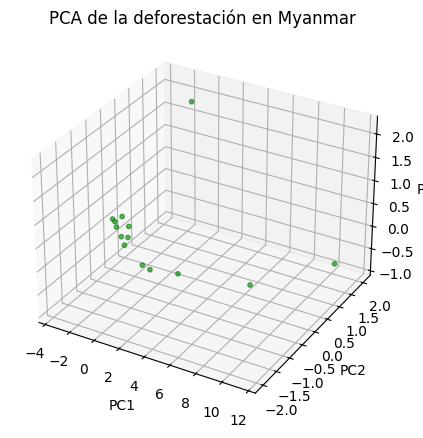

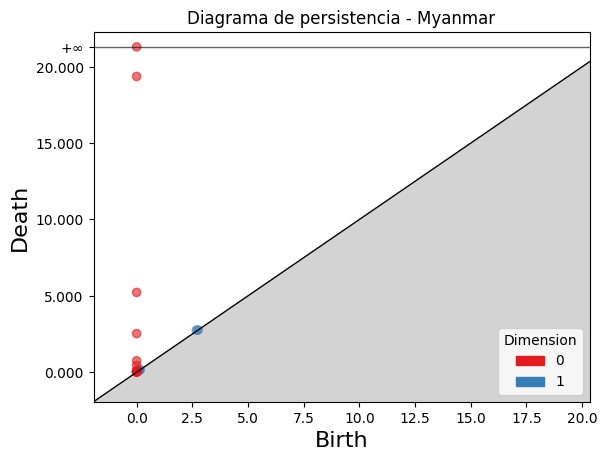


Procesando país: Nepal

Muy pocos datos para Nepal, se omite.

Procesando país: Nicaragua

Varianza explicada por los 3 componentes: [0.90479675 0.04685965 0.0288254 ]


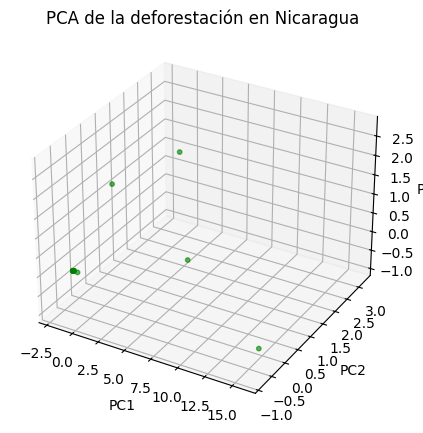

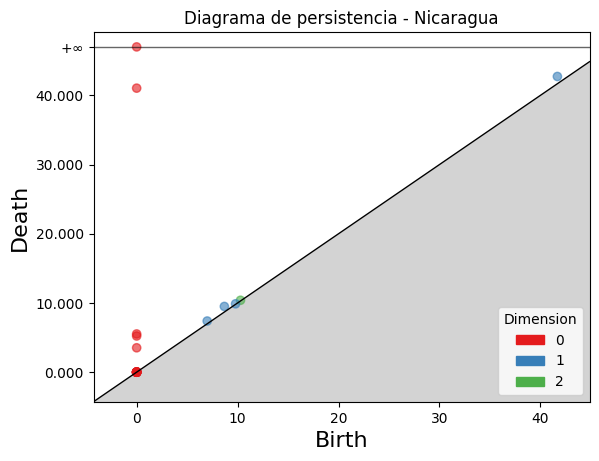


Procesando país: Nigeria

Varianza explicada por los 3 componentes: [0.77898706 0.13645801 0.03862156]


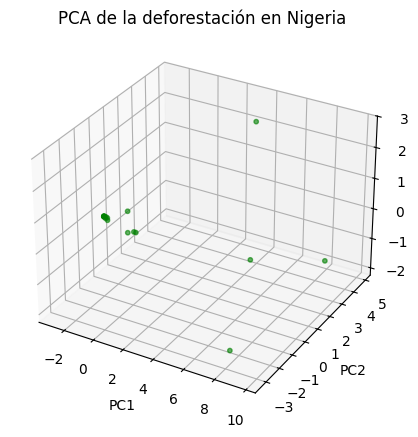

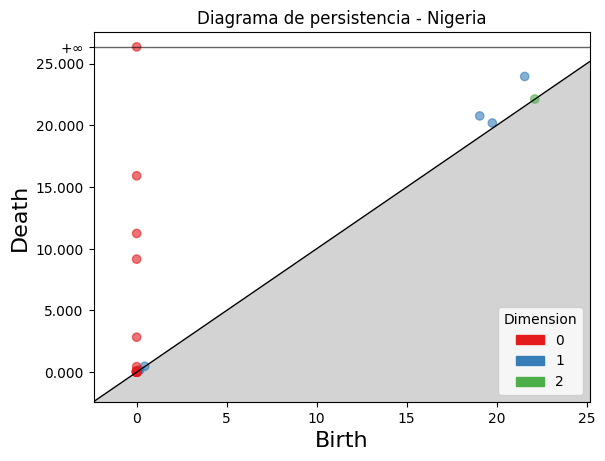


Procesando país: Panama

Varianza explicada por los 3 componentes: [0.81512587 0.11845794 0.02155593]


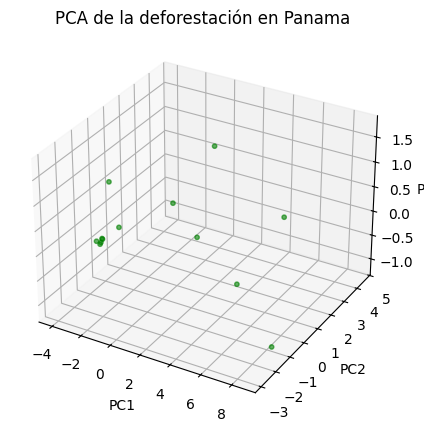

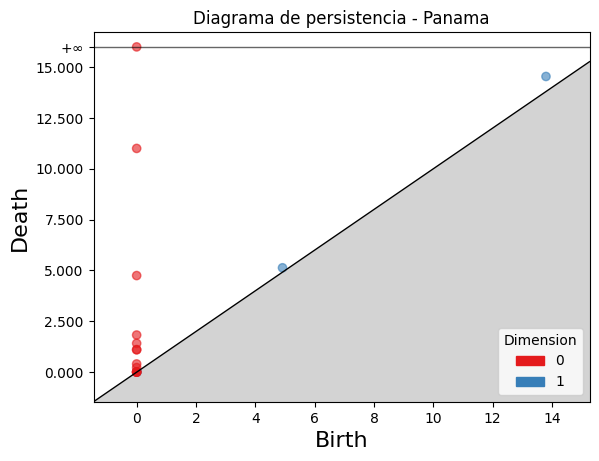


Procesando país: Papua New Guinea

Varianza explicada por los 3 componentes: [0.73859762 0.12182636 0.04569642]


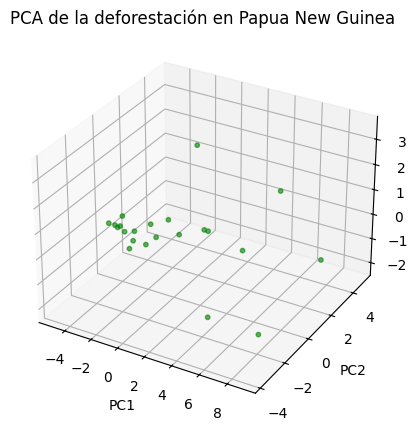

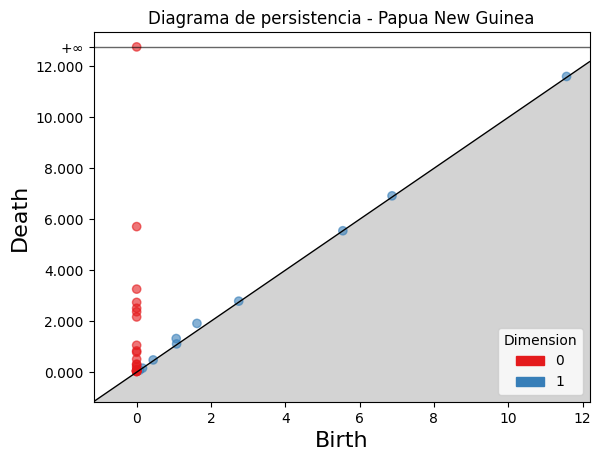


Procesando país: Paraguay

Varianza explicada por los 3 componentes: [0.79319684 0.08431655 0.04534201]


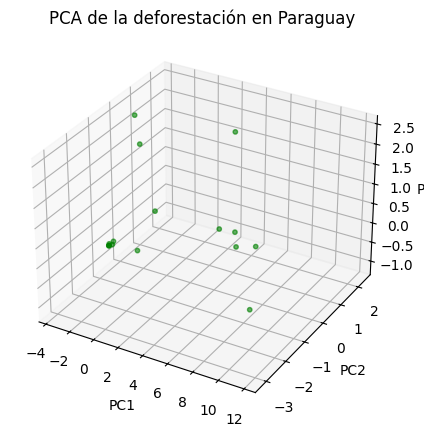

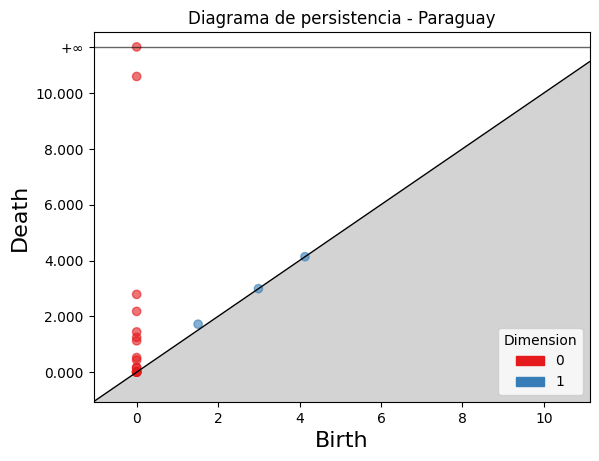


Procesando país: Peru

Varianza explicada por los 3 componentes: [0.90973835 0.06365575 0.0140839 ]


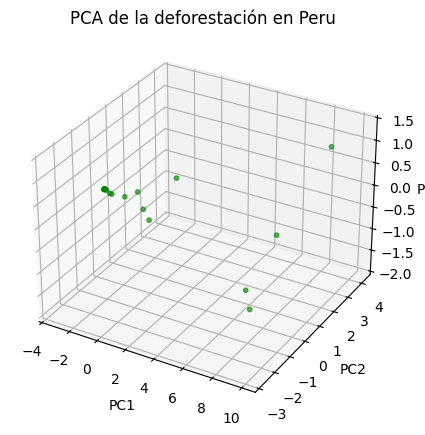

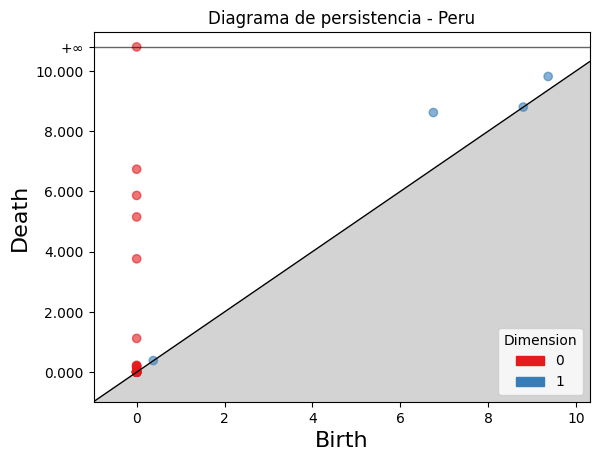


Procesando país: Philippines

Varianza explicada por los 3 componentes: [0.78239735 0.06661904 0.05290659]


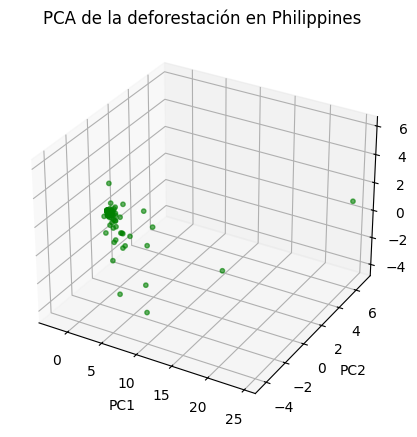

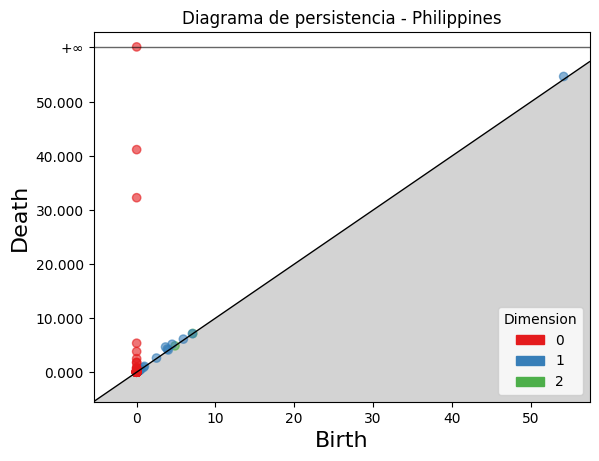


Procesando país: Republic of the Congo

Varianza explicada por los 3 componentes: [0.77020182 0.07694862 0.05024629]


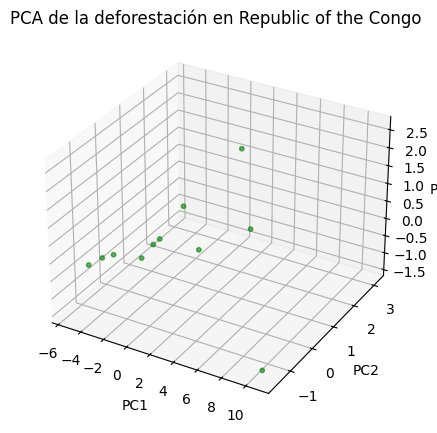

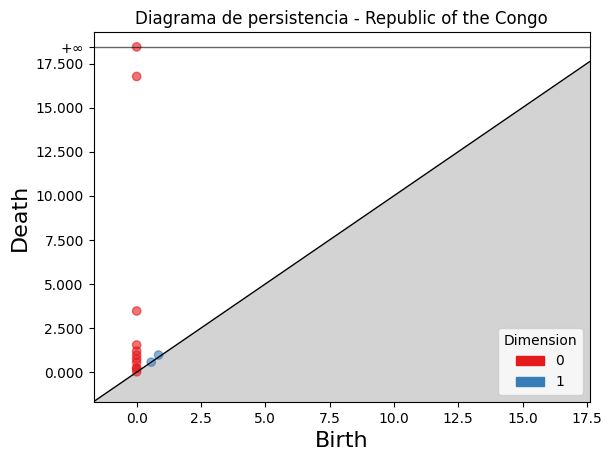


Procesando país: Rwanda

Muy pocos datos para Rwanda, se omite.

Procesando país: Senegal

Muy pocos datos para Senegal, se omite.

Procesando país: Sierra Leone

Muy pocos datos para Sierra Leone, se omite.

Procesando país: Solomon Islands

Muy pocos datos para Solomon Islands, se omite.

Procesando país: South Africa

Muy pocos datos para South Africa, se omite.

Procesando país: South Sudan

Muy pocos datos para South Sudan, se omite.

Procesando país: Sri Lanka

Varianza explicada por los 3 componentes: [0.46786338 0.25637087 0.10902967]


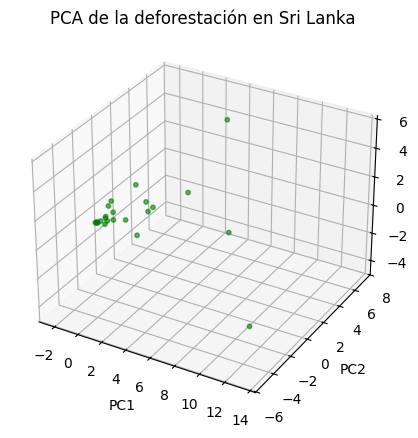

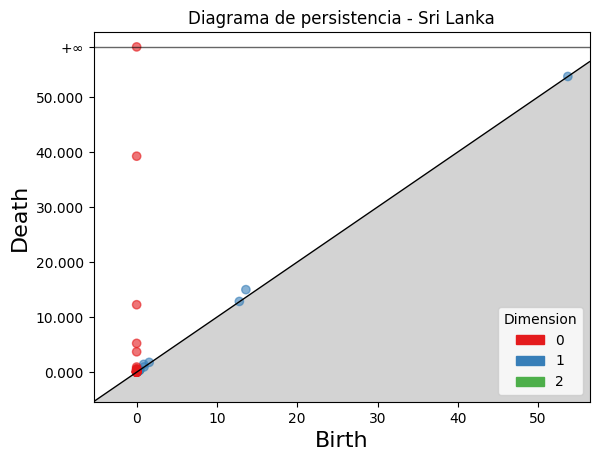


Procesando país: Suriname

Varianza explicada por los 3 componentes: [0.93123648 0.03930144 0.0202159 ]


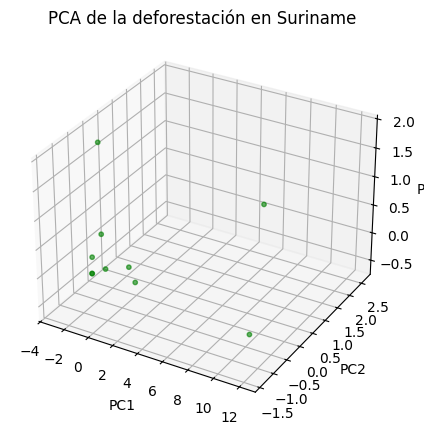

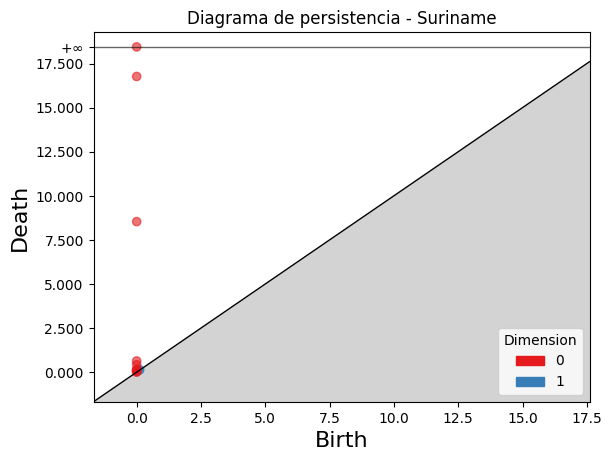


Procesando país: Tanzania

Varianza explicada por los 3 componentes: [0.87878705 0.04664695 0.03501573]


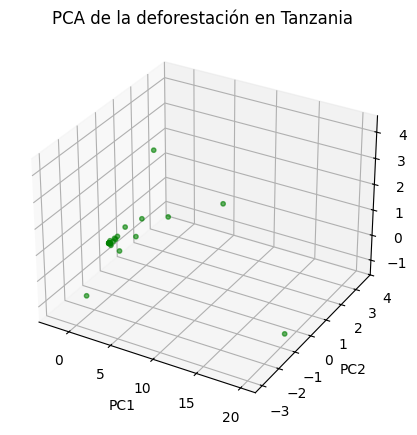

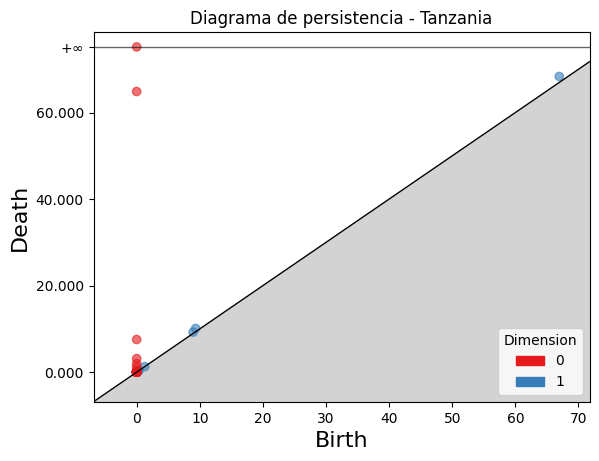


Procesando país: Thailand

Varianza explicada por los 3 componentes: [0.611071   0.25887758 0.03162544]


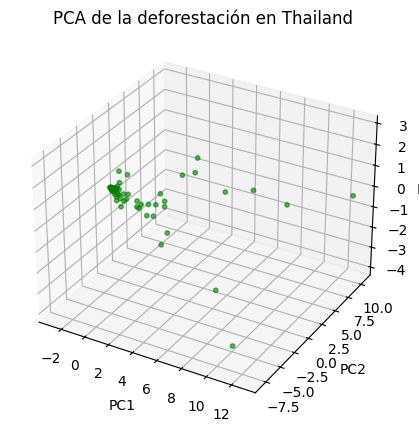

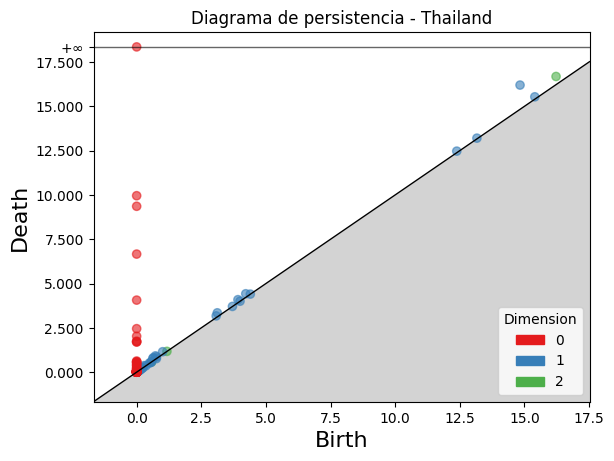


Procesando país: Togo

Muy pocos datos para Togo, se omite.

Procesando país: Uganda

Varianza explicada por los 3 componentes: [0.73698016 0.10555755 0.0877784 ]


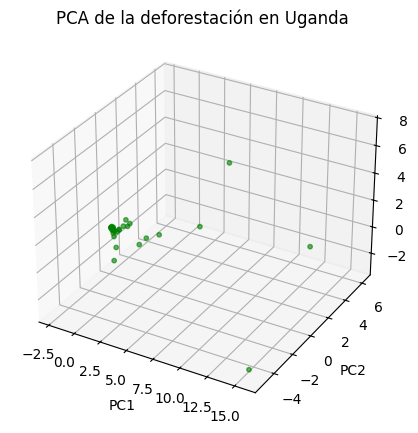

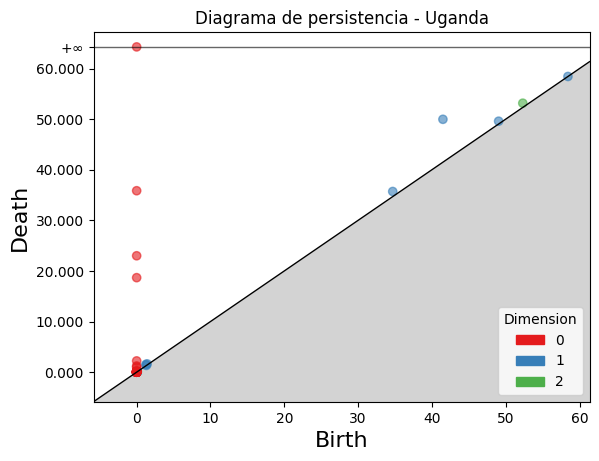


Procesando país: United States

Muy pocos datos para United States, se omite.

Procesando país: Vanuatu

Muy pocos datos para Vanuatu, se omite.

Procesando país: Venezuela

Varianza explicada por los 3 componentes: [0.93235356 0.05260284 0.00929829]


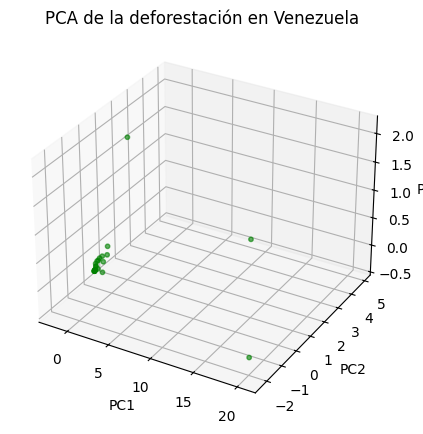

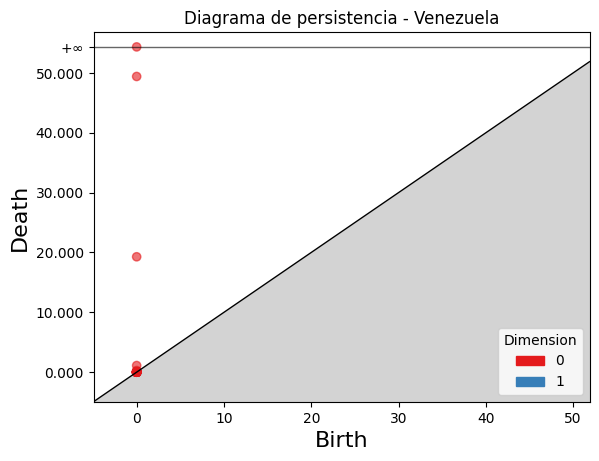


Procesando país: Vietnam

Varianza explicada por los 3 componentes: [0.65286578 0.17254714 0.0555091 ]


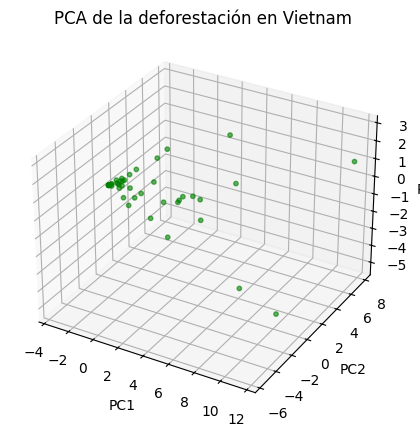

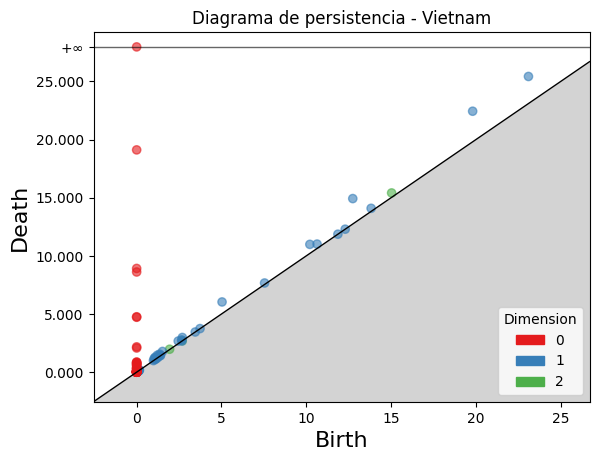


Procesando país: Virgin Islands, U.S.

Muy pocos datos para Virgin Islands, U.S., se omite.

Procesando país: Zambia

Muy pocos datos para Zambia, se omite.

Procesando país: Zimbabwe

Muy pocos datos para Zimbabwe, se omite.


In [ ]:
#Deforestación por cada país (CICLO)

#Convertir variables categoricas
df["country"] = df["country"].astype("category")
df["subnational1"] = df["subnational1"].astype("category")

# Diccionario para guardar los PCA de cada país
country_pca_points = {}

# Obtener lista de países
countries = df["country"].unique()

# Aquí guardaremos todos los diagramas de persistencia y distancias
results = []
country_diagrams = {}

#Recorre por país
for country in countries:
    print(f"\n===============================")
    print(f"Procesando país: {country}")
    print(f"===============================\n")

    #Filtrar datos del país actual
    df_country = df[df["country"] == country]

    #Quitar columnas categóricas
    X = df_country.drop(columns=["country", "subnational1"]).values

    #Evitar errores si el país tiene pocos datos
    if X.shape[0] < 10:
        print(f"Muy pocos datos para {country}, se omite.")
        continue

    #Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #PCA a 3 componentes
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    print("Varianza explicada por los 3 componentes:", pca.explained_variance_ratio_)

    country_pca_points[country] = X_pca

    #Graficar PCA
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c="green", s=10, alpha=0.6)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.title(f"PCA de la deforestación en {country}")
    plt.show()

    try:
        # Alpha Complex
        alpha_complex = gudhi.AlphaComplex(points=X_pca)
        simplex_tree = alpha_complex.create_simplex_tree()
        diag = simplex_tree.persistence()

        if len(diag) == 0:
            print(f"No se generó diagrama para {country}.")
            continue

        country_diagrams[country] = diag

        # Graficar
        gudhi.plot_persistence_diagram(diag)
        plt.title(f"Diagrama de persistencia - {country}")
        plt.show()

        # Guardar datos
        for dim, pair in diag:
            birth, death = pair
            # Evitar infinitos
            if np.isinf(death):
                death = np.nan
            results.append({
                "country": country,
                "dimension": dim,
                "birth": birth,
                "death": death
            })

    except Exception as e:
        print(f"Error en {country}: {e}")


In [ ]:
#Distancias pico de botella

#Dataframe
df_results = pd.DataFrame(results)

#Mostrar Dataframe
print("\n=== DataFrame de diagramas de persistencia ===")
print(df_results.head())
print(f"\nTotal de filas: {len(df_results)}")

#10 primeros países del diccionario
countries_list = list(country_diagrams.keys())[:10]

#Para todos los paises
#N = len(country_diagrams)
#countries_list = list(country_diagrams.keys())[:N]

print("\n=== Países incluidos en el cálculo de Bottleneck ===")
for i, p in enumerate(countries_list):
    print(f"{i+1}. {p}")

distances = []

#Recorre los paises
for i in range(len(countries_list)):
    for j in range(i+1, len(countries_list)):
        c1, c2 = countries_list[i], countries_list[j]

        # Filtrar los puntos H1
        d1 = [p[1] for p in country_diagrams[c1] if p[0] == 1]
        d2 = [p[1] for p in country_diagrams[c2] if p[0] == 1]

        if len(d1) == 0 or len(d2) == 0:
            print(f" {c1} o {c2} no tienen puntos H1. No se calcula distancia.")
            continue

        # Calcular distancia de pico de botella
        dist = bottleneck_distance(d1, d2)

        distances.append({
            "country_1": c1,
            "country_2": c2,
            "bottleneck_distance": dist
        })

df_distances = pd.DataFrame(distances)

print("\n=== Distancias pico de botella entre países ===")
print(df_distances.to_string(index=False))

print(f"\nTotal de pares calculados: {len(df_distances)}")



=== DataFrame de diagramas de persistencia ===
  country  dimension      birth      death
0  Angola          2   0.406513   0.406570
1  Angola          1   6.910231   7.164131
2  Angola          1  33.864036  34.078074
3  Angola          1  37.703701  37.747710
4  Angola          1   0.354720   0.377274

Total de filas: 1458

=== Países incluidos en el cálculo de Bottleneck ===
1. Angola
2. Bhutan
3. Brazil
4. Cambodia
5. Central African Republic
6. Colombia
7. Cuba
8. Democratic Republic of the Congo
9. Dominican Republic
10. Ecuador

=== Distancias pico de botella entre países ===
                       country_1                        country_2  bottleneck_distance
                          Angola                           Bhutan             0.780784
                          Angola                           Brazil             0.364022
                          Angola                         Cambodia             0.263325
                          Angola         Central African Repu

Cálculo de distancias mediante característica de Euler

In [ ]:
!pip install pyEulerCurves
!pip install ripser
!pip install persim
!pip install POT

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for pyEulerCurves: filename=pyeulercurves-0.5.post0-cp312-cp312-linux_x86_64.whl size=202955 sha256=0f140fdf7a13be0b01ac160c3db8d442f6be3c080c9cb3ca198c680e5fc0aa80
  Stored in directory: /root/.cache/pip/wheels/d9/8f/49/986e8f3207d48478e6abbbbdf62cc11ef1389beab7a6fae001
Successfully built pyEulerCurves
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.3/827.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.6 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=895509e2f3a2e408ceb8fe266c98b954c86ad33d460da205099f417dfa1a06e2
  Stored in directory: /root/.cache/pip/wheels/2a/fd/fe/f4

In [ ]:
from pyEulerCurves import ECC_from_pointcloud, plot_euler_curve
from ripser import Rips
rips = Rips()
from persim import plot_diagrams
import persim
import scipy as sp
from matplotlib import cm
from sklearn import linear_model
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean
from sklearn.utils import resample
from sklearn.metrics import pairwise_distances

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Países con ECC: ['Angola', 'Bhutan', 'Brazil', 'Cambodia', 'Central African Republic', 'Colombia', 'Cuba', 'Democratic Republic of the Congo', 'Dominican Republic', 'Ecuador']
Matriz de distancias ECC:
                                        Angola        Bhutan        Brazil  \
Angola                                0.000000   3678.728762  15298.521829   
Bhutan                             3678.728762      0.000000  12909.348590   
Brazil                            15298.521829  12909.348590      0.000000   
Cambodia                           5652.644450   2109.248797  11282.836905   
Central African Republic           1316.259799   2443.964731  14229.712679   
Colombia                          35051.190783  32419.121756  19861.957982   
Cuba                                564.593903   3194.613461  15049.840312   
Democratic Republic of the Congo  12490.572190   9079.824090   7667.611605   
Dominican Republic                 8316.395357   5967.264420   7355.853953   
Ecuador           

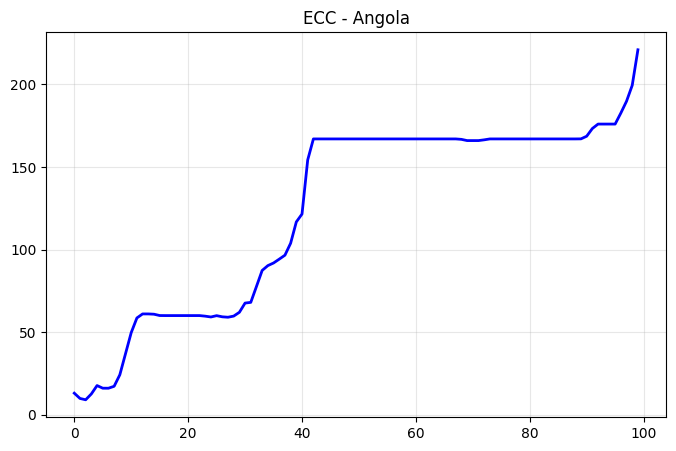

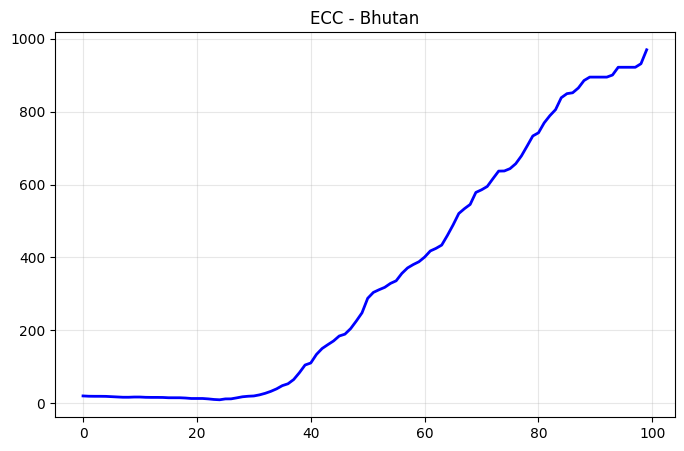

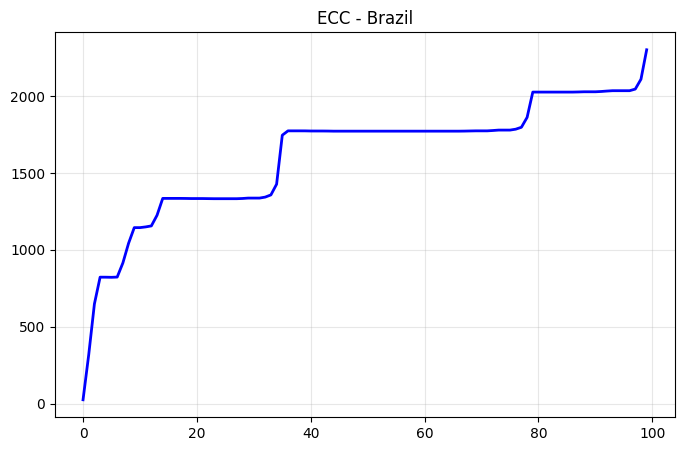

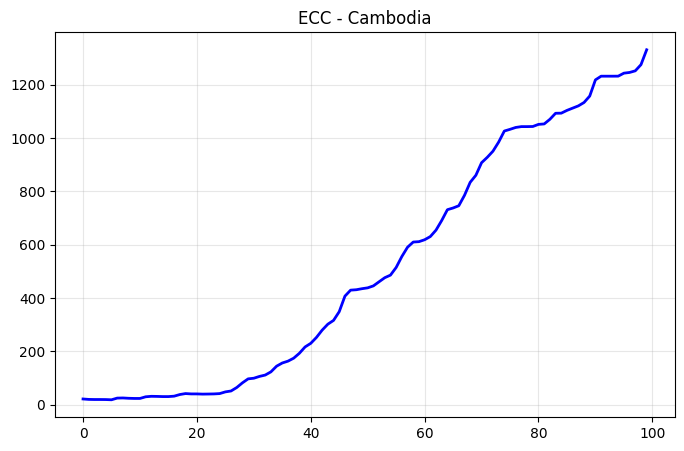

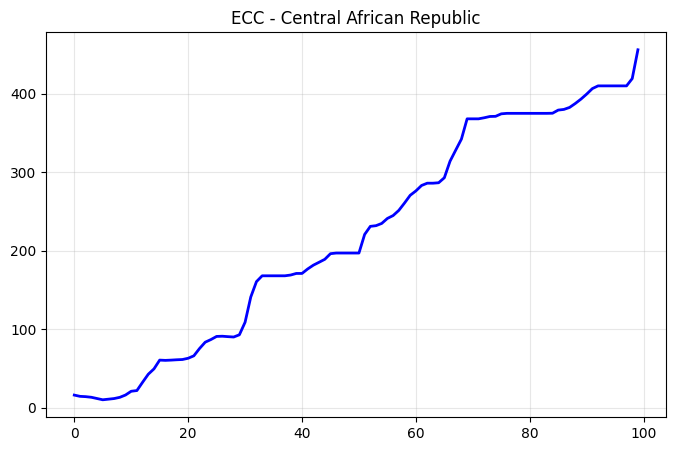

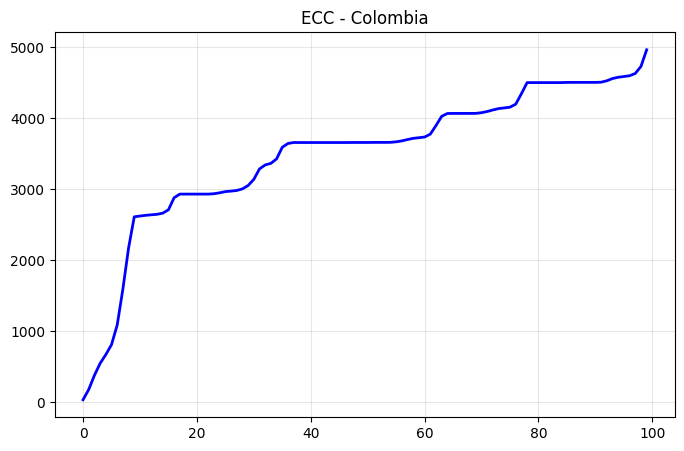

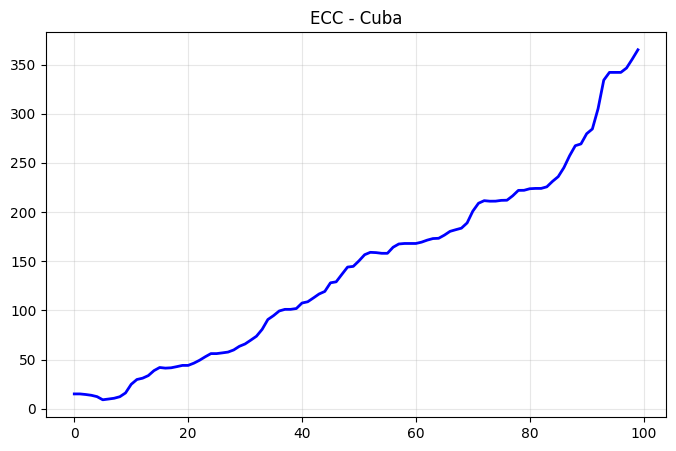

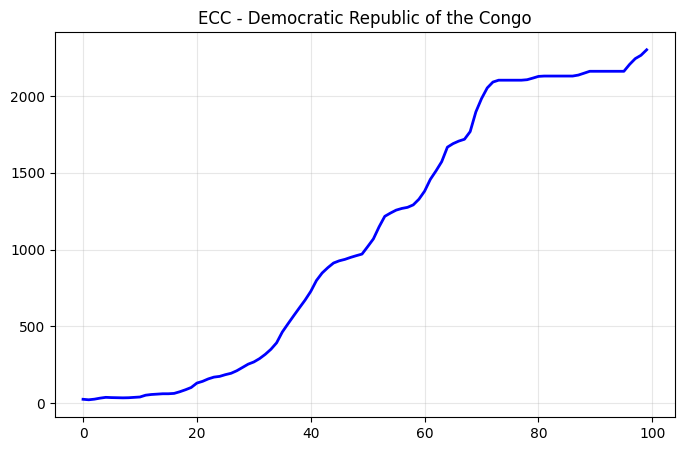

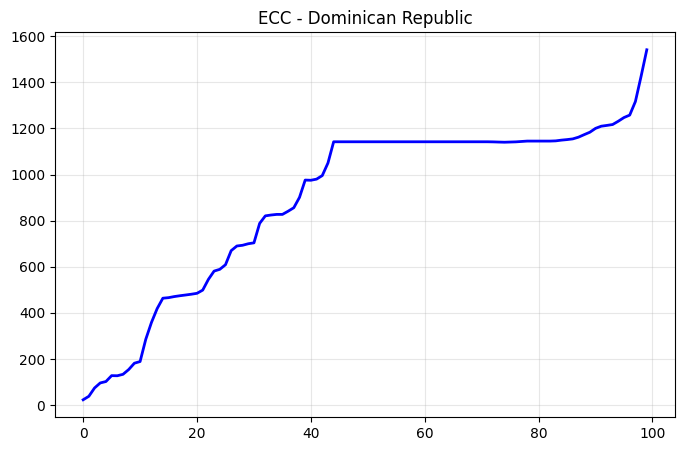

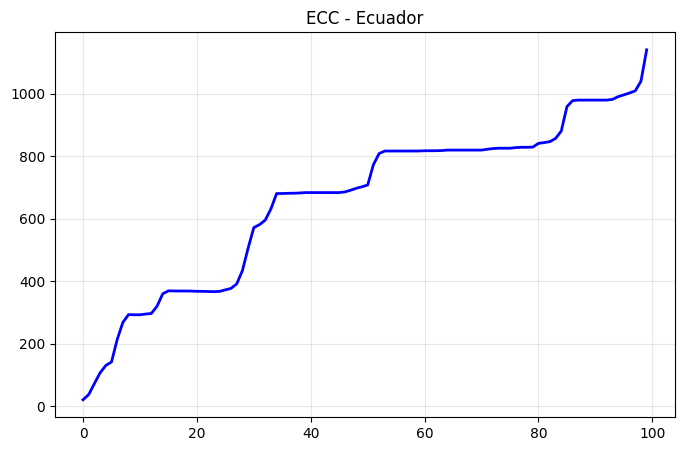

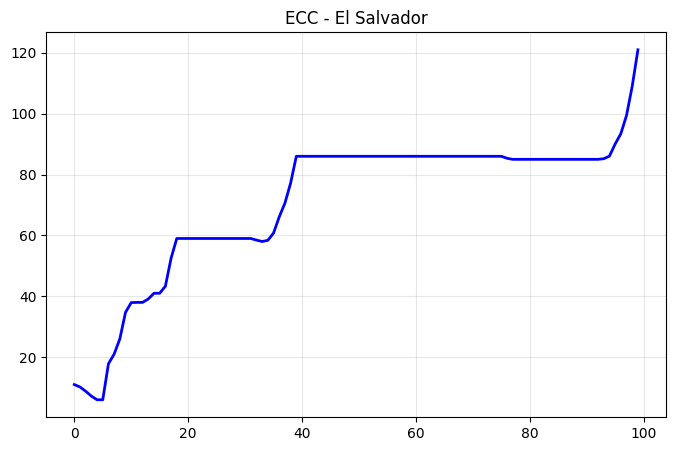

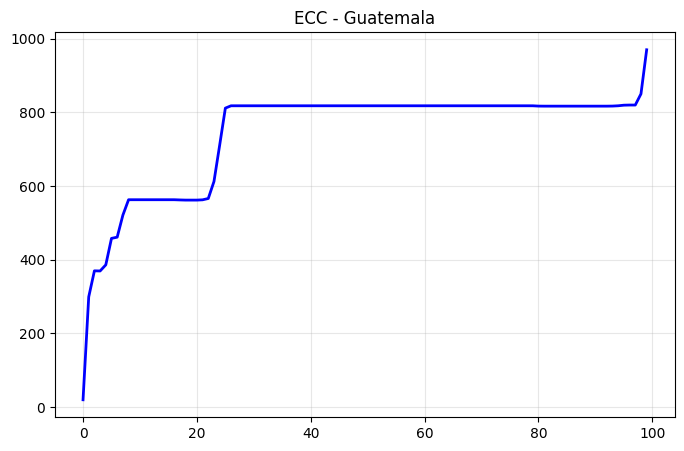

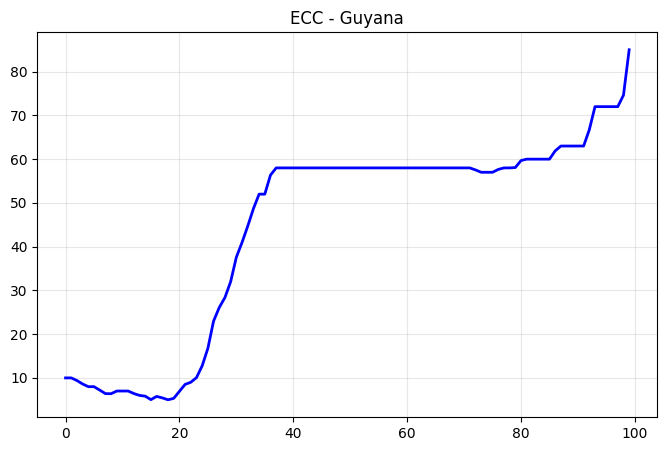

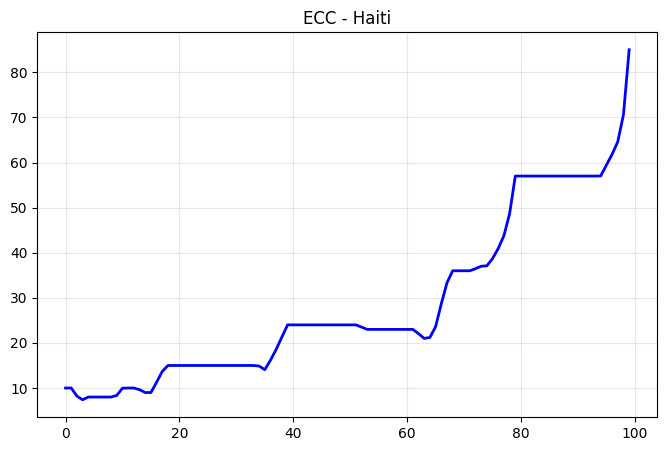

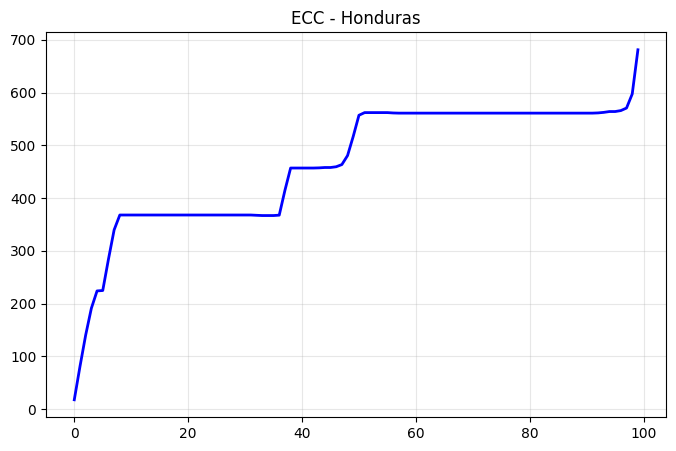

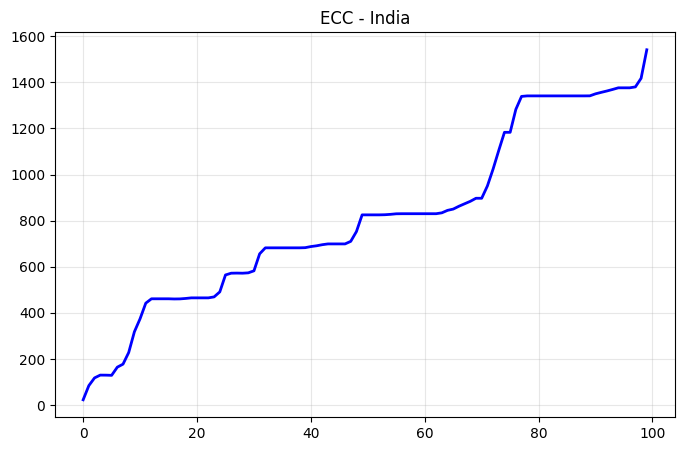

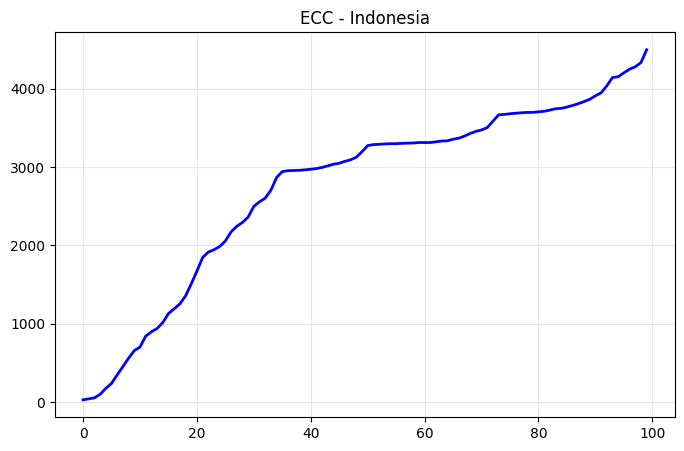

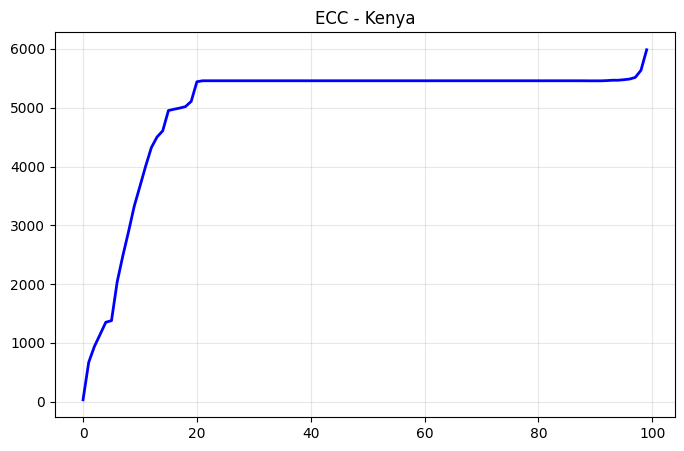

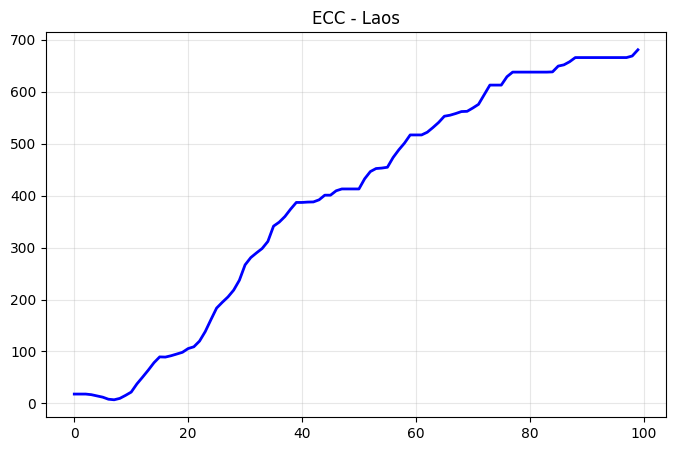

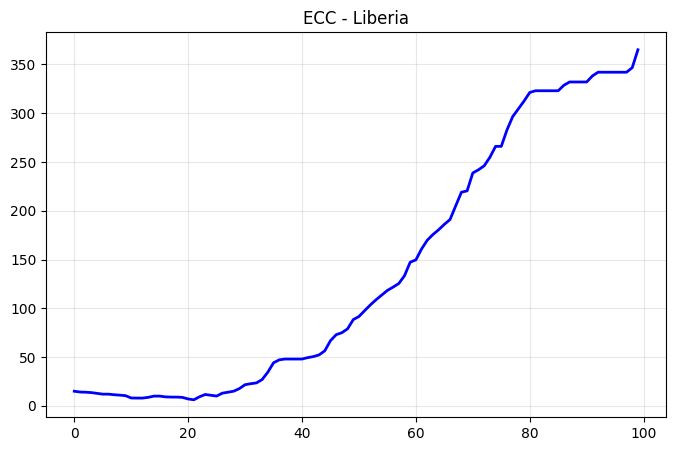

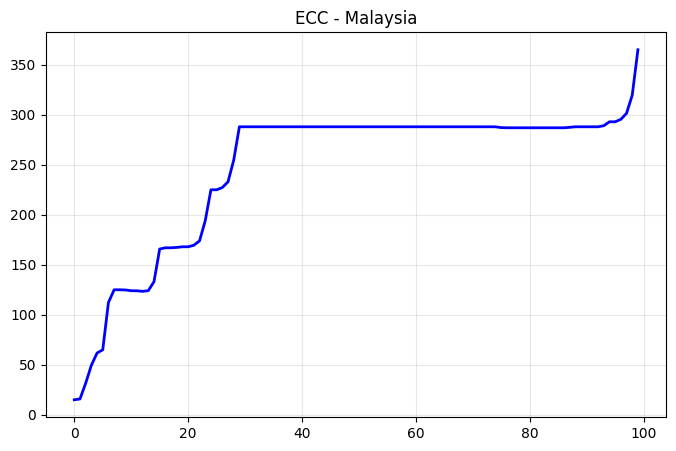

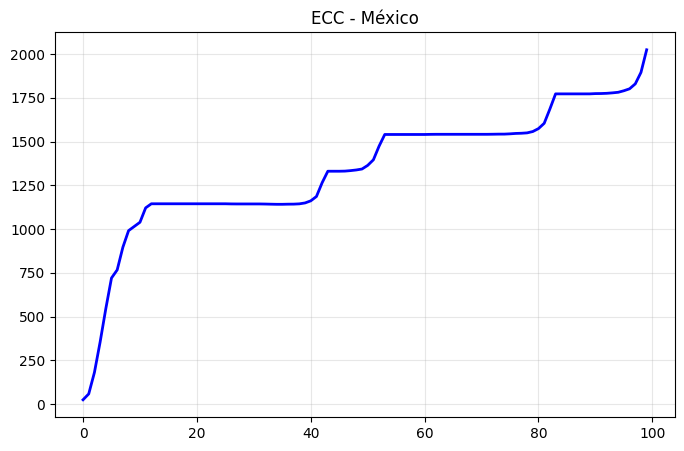

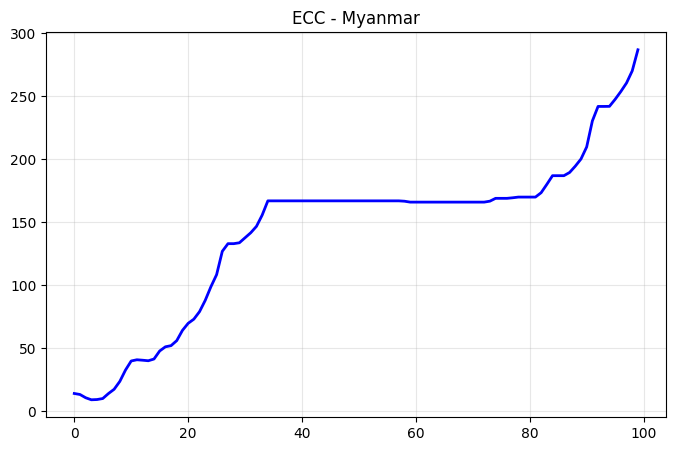

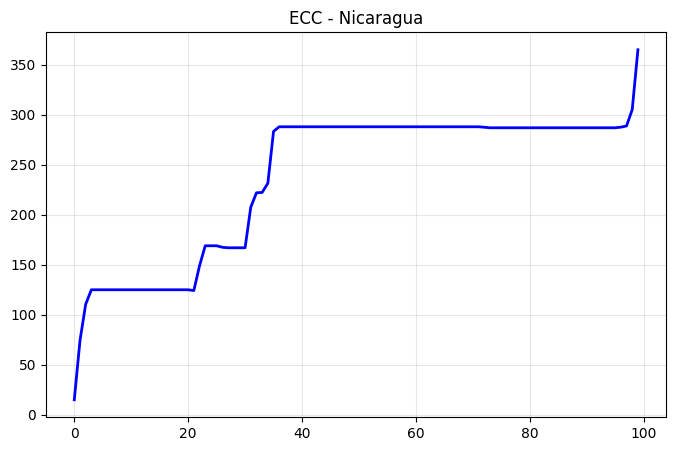

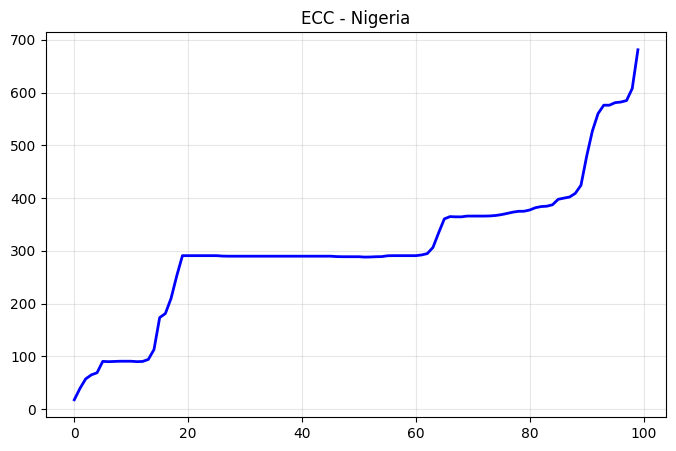

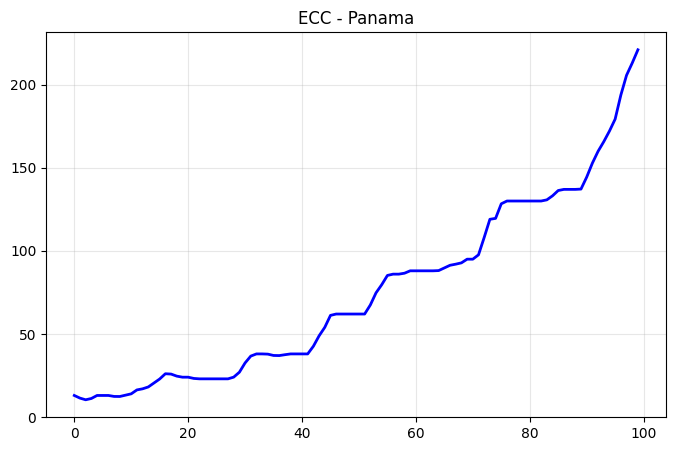

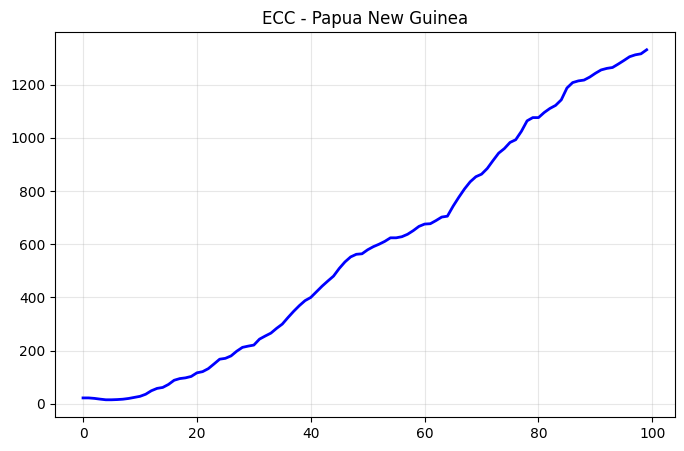

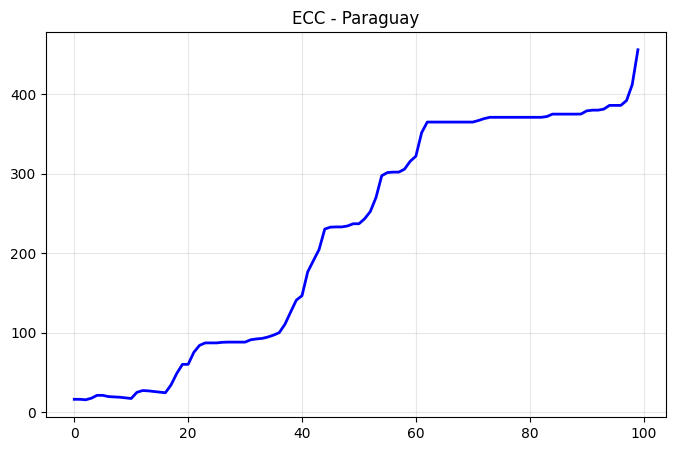

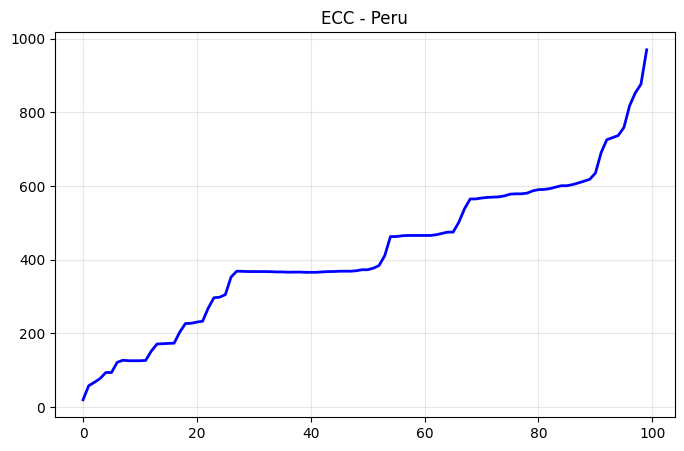

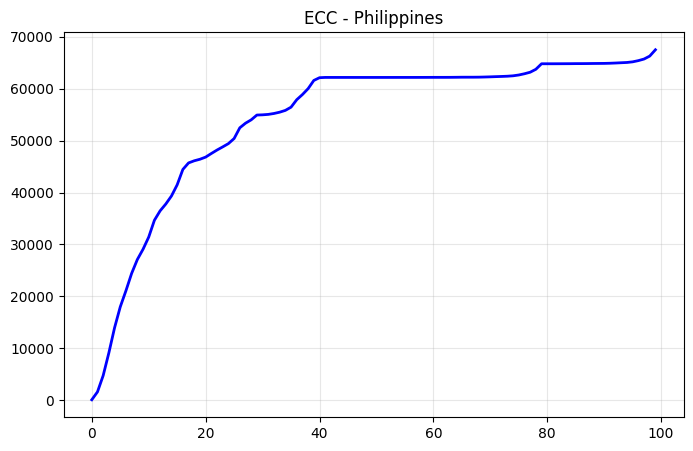

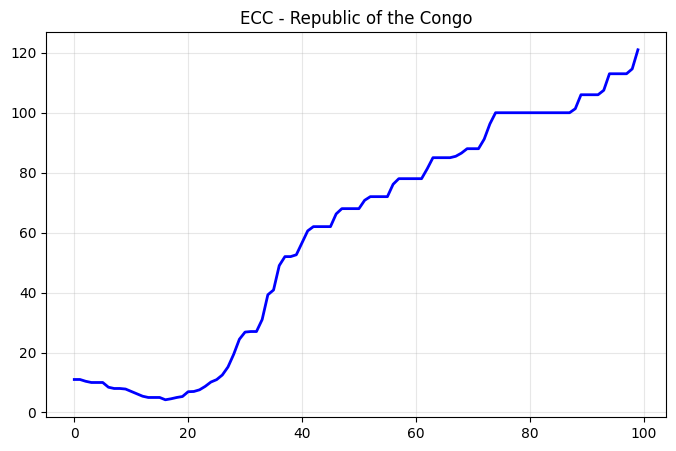

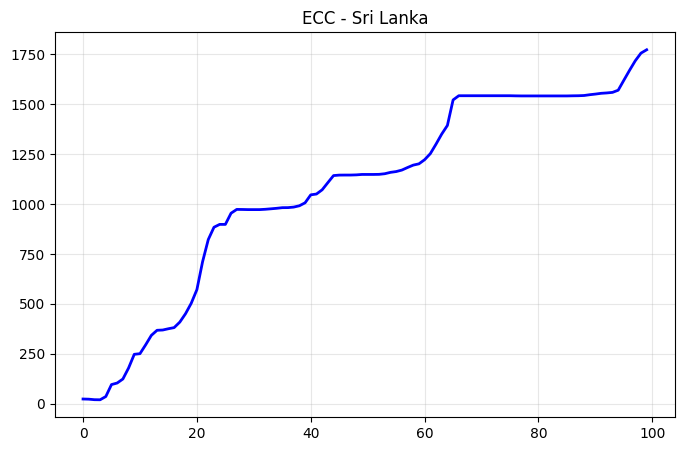

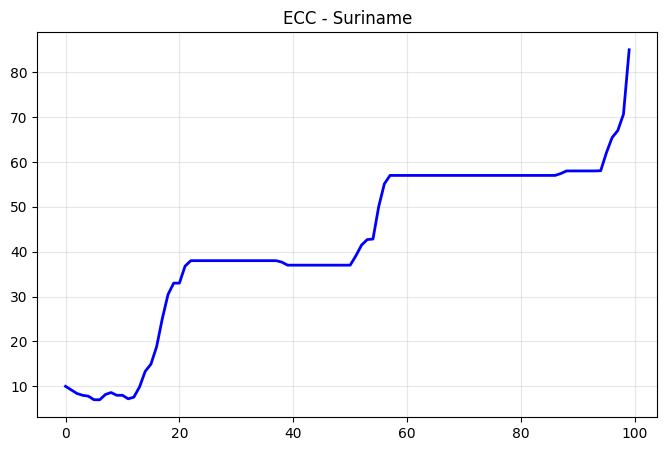

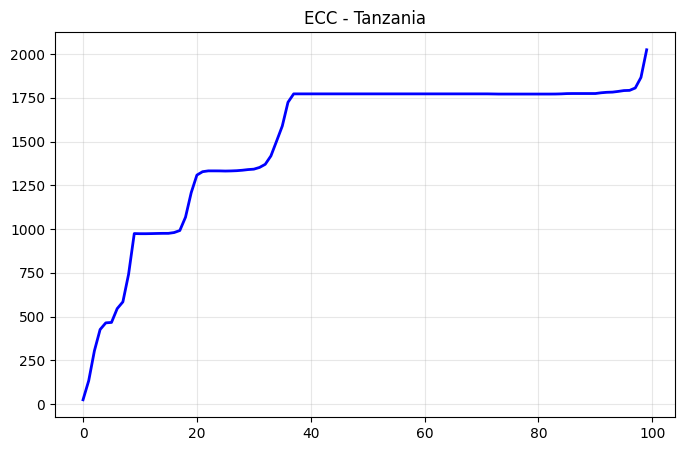

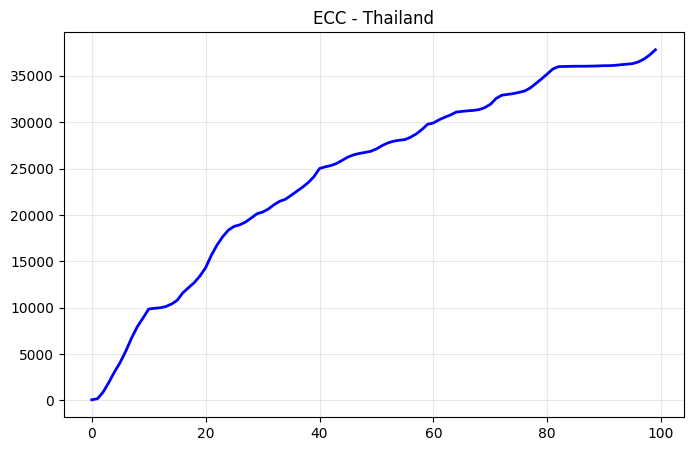

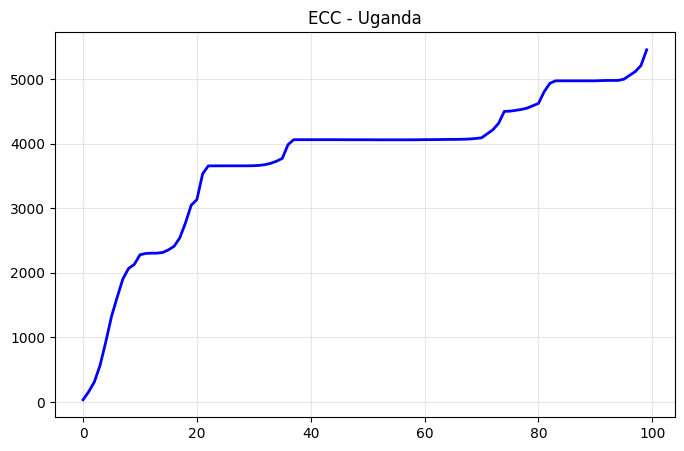

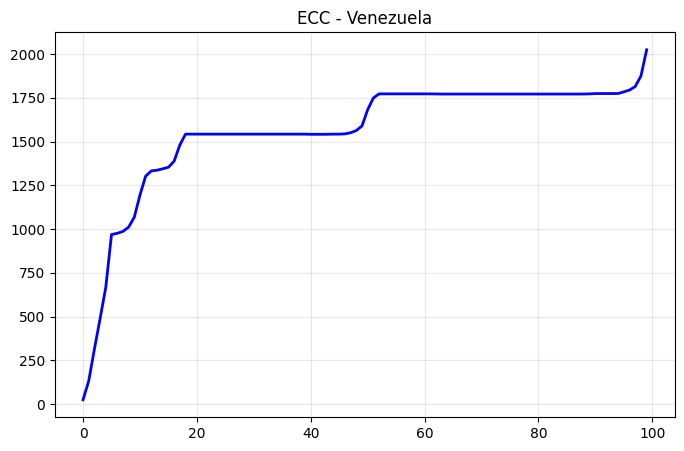

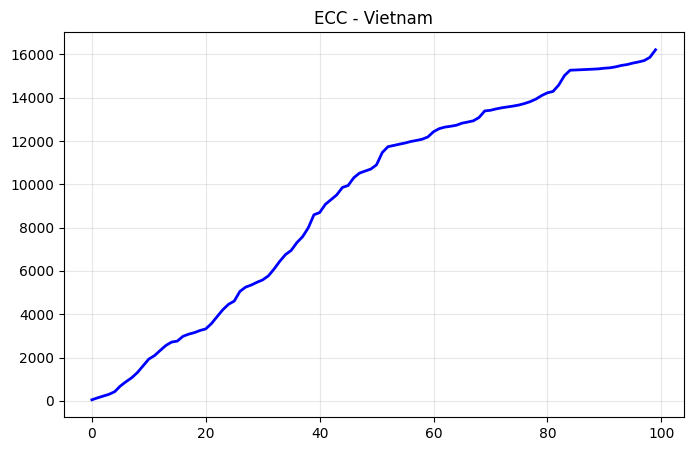

In [ ]:
#Curva caracteristica de Euler

def compute_ecc_rips(points, max_dim=2, n_steps=100, max_radius=None):

    # Calcular ECC hasta dimensión 2.

    n = points.shape[0]
    if n == 0:
        return np.array([]), np.array([])

    # Calcular distancias Euclidianas entre todos los puntos
    # Desde r = 0 hasta un r máximo donde todos se conectan.
    D = squareform(pdist(points, metric='euclidean'))
    if max_radius is None:
        max_radius = np.max(D)
        if max_radius == 0:
            max_radius = 1.0

    #Crear los radios para la curva ECC
    radii = np.linspace(0.0, max_radius, n_steps)
    ecc = np.zeros_like(radii)

    # Precalcular índices superiores (optimiza)
    iu = np.triu_indices(n, k=1)

    #Loop para calcular ECC(r)
    for idx, r in enumerate(radii):

        #existe una arista si la distancia es menor o igual a r.
        A = (D <= r).astype(int)
        np.fill_diagonal(A, 0)

        #contar vertices
        n0 = n

        # Contar aristas (1-simplicies)
        n1 = int(np.sum(np.triu(A, 1)))

        # Contar triángulos (2-simplicies)
        n2 = 0
        if max_dim >= 2:
            A_int = A.astype(np.int64)
            A2 = A_int @ A_int
            A3 = A2 @ A_int
            trace = np.trace(A3)
            n2 = int(trace // 6)

        # Calcular la característica de Euler
        ecc[idx] = n0 - n1 + n2

    return radii, ecc

#country_pca_points: dict {country: X_pca (ndarray n_points x 3)}

#Calcular ecc para todos los paises
def compute_ecc_for_all_countries(country_pca_points, sample_max=None, n_steps=100, L=100):
    country_ecc = {}
    for country, points in country_pca_points.items():
        if points is None or points.shape[0] < 3:
            # paises con pocos puntos
            continue
        pts = points.copy()
        if sample_max is not None and pts.shape[0] > sample_max:
            # muestreo
            idx = np.random.choice(pts.shape[0], size=sample_max, replace=False)
            pts = pts[idx]

        radii, ecc_vals = compute_ecc_rips(pts, max_dim=2, n_steps=n_steps)
        # Si la curva es constante o vacía, saltar
        if ecc_vals.size == 0:
            continue

        #Interpolación a un tamaño fijo L
        x_old = np.linspace(0, 1, len(ecc_vals))
        x_new = np.linspace(0, 1, L)
        ecc_resampled = np.interp(x_new, x_old, ecc_vals)
        country_ecc[country] = ecc_resampled

    return country_ecc

# Comparar curvas: calcular matriz de distancias
def ecc_distance_matrix(country_ecc, metric='euclidean'):

    countries = list(country_ecc.keys())
    if len(countries) == 0:
        return pd.DataFrame()
    #Convertir curvas a matriz NxL
    curves = np.vstack([country_ecc[c] for c in countries])
    #calcular matriz de distancias
    dist_mat = pairwise_distances(curves, metric=metric)
    df = pd.DataFrame(dist_mat, index=countries, columns=countries)
    return df

country_ecc = compute_ecc_for_all_countries(country_pca_points, sample_max=800, n_steps=80, L=100)
df_ecc_dist = ecc_distance_matrix(country_ecc, metric='euclidean')

#ECC para los 10 primeros paises
print("Países con ECC:", list(country_ecc.keys())[:10])
print("Matriz de distancias ECC:")
print(df_ecc_dist.iloc[:10, :10])

#ECC para todos los paises
#N = len(country_diagrams)
#print("Matriz de distancias ECC:")
#print(df_ecc_dist.iloc[:N, :N])

#Graficar ECC
def plot_each_ecc(country_ecc):
    for country, ecc in country_ecc.items():
        plt.figure(figsize=(8,5))

        plt.plot(ecc, linewidth=2, color="blue")
        plt.title(f"ECC - {country}")
        plt.grid(True, alpha=0.3)

        plt.show()

plot_each_ecc(country_ecc)

In [ ]:
#Distancias Wasserstein

from gudhi.wasserstein import wasserstein_distance

#Dataframe
df_results = pd.DataFrame(results)

#Mostrar Dataframe
print("\n=== DataFrame de diagramas de persistencia ===")
print(df_results.head())
print(f"\nTotal de filas: {len(df_results)}")

#10 primeros países del diccionario
countries_list = list(country_diagrams.keys())[:10]

#Para todos los paises
#N = len(country_diagrams)
#countries_list = list(country_diagrams.keys())[:N]

print("\n=== Países incluidos en el cálculo de Wasserstein ===")
for i, p in enumerate(countries_list):
    print(f"{i+1}. {p}")

distances = []

#Recorre los paises
for i in range(len(countries_list)):
    for j in range(i+1, len(countries_list)):
        c1, c2 = countries_list[i], countries_list[j]

        # Filtrar puntos H1
        d1 = [p[1] for p in country_diagrams[c1] if p[0] == 1]
        d2 = [p[1] for p in country_diagrams[c2] if p[0] == 1]

        if len(d1) == 0 or len(d2) == 0:
            print(f" {c1} o {c2} no tienen puntos H1. No se calcula distancia.")
            continue

        # Convertir a numpy arrays para Gudhi
        d1_np = np.array(d1)
        d2_np = np.array(d2)

        #Calcular Wassertein
        dist = wasserstein_distance(d1_np, d2_np, order=1, internal_p=2)

        distances.append({
            "country_1": c1,
            "country_2": c2,
            "wasserstein_distance": dist
        })

df_distances = pd.DataFrame(distances)

print("\n=== Distancias Wasserstein entre países ===")
print(df_distances.to_string(index=False))

print(f"\nTotal de pares calculados: {len(df_distances)}")


=== DataFrame de diagramas de persistencia ===
  country  dimension      birth      death
0  Angola          2   0.406513   0.406570
1  Angola          1   6.910231   7.164131
2  Angola          1  33.864036  34.078074
3  Angola          1  37.703701  37.747710
4  Angola          1   0.354720   0.377274

Total de filas: 1458

=== Países incluidos en el cálculo de Wasserstein ===
1. Angola
2. Bhutan
3. Brazil
4. Cambodia
5. Central African Republic
6. Colombia
7. Cuba
8. Democratic Republic of the Congo
9. Dominican Republic
10. Ecuador

=== Distancias Wasserstein entre países ===
                       country_1                        country_2  wasserstein_distance
                          Angola                           Bhutan              6.252122
                          Angola                           Brazil              0.899336
                          Angola                         Cambodia              2.149338
                          Angola         Central African Rep